In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15, 5)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Obtaining the Data - Project 1

In [2]:
import os
os.chdir("/Users/zaid/Desktop/StockMarketProject")

In [3]:
#Reading in the two datasets we will start to work with
fundamentals_df = pd.read_csv("S&P_500Finance.csv")
stock_time_df = pd.read_csv("S&P_500_Time2.csv")

In [4]:
#This is the dataset that will be used to classifiy stocks into various categories that peterain/determine their respective growth levels
fundamentals_df

Symbol                    Name                  Sector   Price  \
0      MMM              3M Company             Industrials  222.89   
1      AOS         A.O. Smith Corp             Industrials   60.24   
2      ABT     Abbott Laboratories             Health Care   56.27   
3     ABBV             AbbVie Inc.             Health Care  108.48   
4      ACN           Accenture plc  Information Technology  150.51   
..     ...                     ...                     ...     ...   
500    XYL              Xylem Inc.             Industrials   70.24   
501    YUM         Yum! Brands Inc  Consumer Discretionary   76.30   
502    ZBH  Zimmer Biomet Holdings             Health Care  115.53   
503   ZION           Zions Bancorp              Financials   50.71   
504    ZTS                  Zoetis             Health Care   71.51   

     Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
0             24.31        2.332862            7.92       259.77   
1             27.76        1.147959            1.70        68.39   
2             22.51        1.908982            0.26        64.60   
3             19.41        2.499560            3.29       125.86   
4             25.47        1.714470            5.44       162.60   
..              ...             ...             ...          ...   
500           30.94        1.170079            1.83        76.81   
501           27.25        1.797080            4.07        86.93   
502           14.32        0.794834            9.01       133.49   
503           17.73        1.480933            2.60        55.61   
504           32.80        0.682372            1.65        80.13   

     52 Week High    Market Cap        EBITDA  Price/Sales  Price/Book  \
0         175.490  1.387211e+11  9.048000e+09     4.390271       11.34   
1          48.925  1.078342e+10  6.010000e+08     3.575483        6.35   
2          42.280  1.021210e+11  5.744000e+09     3.740480        3.19   
3          60.050  1.813863e+11  1.031000e+10     6.291571       26.14   
4         114.820  9.876586e+10  5.643228e+09     2.604117       10.62   
..            ...           ...           ...          ...         ...   
500        46.860  1.291502e+10  7.220000e+08     2.726209        5.31   
501        62.850  2.700330e+10  2.289000e+09     6.313636      212.08   
502       108.170  2.445470e+10  2.007400e+09     3.164895        2.39   
503        38.430  1.067068e+10  0.000000e+00     3.794579        1.42   
504        52.000  3.599111e+10  1.734000e+09     9.280896       18.09   

                                           SEC Filings  
0    http://www.sec.gov/cgi-bin/browse-edgar?action...  
1    http://www.sec.gov/cgi-bin/browse-edgar?action...  
2    http://www.sec.gov/cgi-bin/browse-edgar?action...  
3    http://www.sec.gov/cgi-bin/browse-edgar?action...  
4    http://www.sec.gov/cgi-bin/browse-edgar?action...  
..                                                 ...  
500  http://www.sec.gov/cgi-bin/browse-edgar?action...  
501  http://www.sec.gov/cgi-bin/browse-edgar?action...  
502  http://www.sec.gov/cgi-bin/browse-edgar?action...  
503  http://www.sec.gov/cgi-bin/browse-edgar?action...  
504  http://www.sec.gov/cgi-bin/browse-edgar?action...  

[505 rows x 14 columns]

## Data Cleaning and Preprocessing - Stock Fundamentals dataset

In [5]:
#Showcasing the number of observations for each feature with missing values
#Showcasing the 2 observations with missing P/E values  
print(fundamentals_df.isna().sum())
fundamentals_df[fundamentals_df["Price/Earnings"].isna()]

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
SEC Filings       0
dtype: int64


Symbol            Name                  Sector  Price  Price/Earnings  \
360   PRGO         Perrigo             Health Care  84.44             NaN   
430    TPR  Tapestry, Inc.  Consumer Discretionary  48.85             NaN   

     Dividend Yield  Earnings/Share  52 Week Low  52 Week High    Market Cap  \
360        0.731261          -28.01        95.93         63.68  1.232638e+10   
430        0.000000            2.09        50.71         36.69  1.424720e+10   

     EBITDA  Price/Sales  Price/Book  \
360     0.0     3.385007        2.03   
430     0.0     4.078549        4.35   

                                           SEC Filings  
360  http://www.sec.gov/cgi-bin/browse-edgar?action...  
430  http://www.sec.gov/cgi-bin/browse-edgar?action...

In [6]:
#Replacing the missing P/E value for the "TPR" stock observation with 23.37. This is because the company has a postivie "Earnings/Share" 
#and "Price/Earnings" is calculated by "Price" divided by "Earnings/Share"
#Also replacing the "Price/Earnings" value for the "PRGO" stock observation with "-1" as this company does not yield a profit as shown 
#for its "Earnings/Share" feature value. 
#Also imputing the missing values in the "Price/Book" feature with the median value of all the values within the feature. 

fundamentals_df.iloc[430, fundamentals_df.columns.get_loc("Price/Earnings")] = 23.37
fundamentals_df.iloc[360, fundamentals_df.columns.get_loc("Price/Earnings")] = -1
fundamentals_df["Price/Book"].fillna(fundamentals_df["Price/Book"].median(), inplace = True)

fundamentals_df.iloc[[360, 430]]
print(fundamentals_df.isna().sum())

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    0
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        0
SEC Filings       0
dtype: int64


In [7]:
#Dropping the SEC filings feature as it is not needed for either the visualization, exploratory, or modeling phases. 
#The SEC filings feature itself is not important. However, the SEC filings in regards to stocks are
#official documents that publicly traded companies are required to submit to the U.S. Securities and Exchance Commision (SEC) 
#and provide a comprehensive overview of a company's financial performance and condition, as well as other critical information for investors. 
fundamentals_df.drop(columns = ["SEC Filings"], inplace = True)
fundamentals_df


Symbol                    Name                  Sector   Price  \
0      MMM              3M Company             Industrials  222.89   
1      AOS         A.O. Smith Corp             Industrials   60.24   
2      ABT     Abbott Laboratories             Health Care   56.27   
3     ABBV             AbbVie Inc.             Health Care  108.48   
4      ACN           Accenture plc  Information Technology  150.51   
..     ...                     ...                     ...     ...   
500    XYL              Xylem Inc.             Industrials   70.24   
501    YUM         Yum! Brands Inc  Consumer Discretionary   76.30   
502    ZBH  Zimmer Biomet Holdings             Health Care  115.53   
503   ZION           Zions Bancorp              Financials   50.71   
504    ZTS                  Zoetis             Health Care   71.51   

     Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
0             24.31        2.332862            7.92       259.77   
1             27.76        1.147959            1.70        68.39   
2             22.51        1.908982            0.26        64.60   
3             19.41        2.499560            3.29       125.86   
4             25.47        1.714470            5.44       162.60   
..              ...             ...             ...          ...   
500           30.94        1.170079            1.83        76.81   
501           27.25        1.797080            4.07        86.93   
502           14.32        0.794834            9.01       133.49   
503           17.73        1.480933            2.60        55.61   
504           32.80        0.682372            1.65        80.13   

     52 Week High    Market Cap        EBITDA  Price/Sales  Price/Book  
0         175.490  1.387211e+11  9.048000e+09     4.390271       11.34  
1          48.925  1.078342e+10  6.010000e+08     3.575483        6.35  
2          42.280  1.021210e+11  5.744000e+09     3.740480        3.19  
3          60.050  1.813863e+11  1.031000e+10     6.291571       26.14  
4         114.820  9.876586e+10  5.643228e+09     2.604117       10.62  
..            ...           ...           ...          ...         ...  
500        46.860  1.291502e+10  7.220000e+08     2.726209        5.31  
501        62.850  2.700330e+10  2.289000e+09     6.313636      212.08  
502       108.170  2.445470e+10  2.007400e+09     3.164895        2.39  
503        38.430  1.067068e+10  0.000000e+00     3.794579        1.42  
504        52.000  3.599111e+10  1.734000e+09     9.280896       18.09  

[505 rows x 13 columns]

In [8]:
#Changing the number format with scientific notation to normal numbers for "Market Cap" and "EBITDA" features
fundamentals_df["Market Cap"] = fundamentals_df["Market Cap"].apply(lambda x: '{:.0f}'.format(x)) 
fundamentals_df["EBITDA"] = fundamentals_df["EBITDA"].apply(lambda x: '{:.0f}'.format(x))

fundamentals_df

Symbol                    Name                  Sector   Price  \
0      MMM              3M Company             Industrials  222.89   
1      AOS         A.O. Smith Corp             Industrials   60.24   
2      ABT     Abbott Laboratories             Health Care   56.27   
3     ABBV             AbbVie Inc.             Health Care  108.48   
4      ACN           Accenture plc  Information Technology  150.51   
..     ...                     ...                     ...     ...   
500    XYL              Xylem Inc.             Industrials   70.24   
501    YUM         Yum! Brands Inc  Consumer Discretionary   76.30   
502    ZBH  Zimmer Biomet Holdings             Health Care  115.53   
503   ZION           Zions Bancorp              Financials   50.71   
504    ZTS                  Zoetis             Health Care   71.51   

     Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
0             24.31        2.332862            7.92       259.77   
1             27.76        1.147959            1.70        68.39   
2             22.51        1.908982            0.26        64.60   
3             19.41        2.499560            3.29       125.86   
4             25.47        1.714470            5.44       162.60   
..              ...             ...             ...          ...   
500           30.94        1.170079            1.83        76.81   
501           27.25        1.797080            4.07        86.93   
502           14.32        0.794834            9.01       133.49   
503           17.73        1.480933            2.60        55.61   
504           32.80        0.682372            1.65        80.13   

     52 Week High    Market Cap       EBITDA  Price/Sales  Price/Book  
0         175.490  138721055226   9048000000     4.390271       11.34  
1          48.925   10783419933    601000000     3.575483        6.35  
2          42.280  102121042306   5744000000     3.740480        3.19  
3          60.050  181386347059  10310000000     6.291571       26.14  
4         114.820   98765855553   5643228000     2.604117       10.62  
..            ...           ...          ...          ...         ...  
500        46.860   12915021000    722000000     2.726209        5.31  
501        62.850   27003303098   2289000000     6.313636      212.08  
502       108.170   24454698119   2007400000     3.164895        2.39  
503        38.430   10670678640            0     3.794579        1.42  
504        52.000   35991109776   1734000000     9.280896       18.09  

[505 rows x 13 columns]

In [9]:
#Data types for each feature in our dataframe 
fundamentals_df.dtypes

Symbol             object
Name               object
Sector             object
Price             float64
Price/Earnings    float64
Dividend Yield    float64
Earnings/Share    float64
52 Week Low       float64
52 Week High      float64
Market Cap         object
EBITDA             object
Price/Sales       float64
Price/Book        float64
dtype: object

In [10]:
#Adding a new feature called "Net Income" which can be calculated by diviing the "Market Cap" by "Price" then multiplying that value to 
#"Price/Earnings". The first part of the calculation calculates the companies total outstanding shares which in turn can be multiplied by
# "Price/Earnings" to calculate total profit. "Net Income" represents the total profit a company receives per quarter and 
#is a crucial metric in measuring a companies financial health and operational performance. 

#Also changing the data type for the "Market Cap" as it is of type "object" and we need it as type "float64" in order to perform arithmetic
#computations 

fundamentals_df["Market Cap"] = fundamentals_df["Market Cap"].apply(pd.to_numeric, errors = "coerce").astype('Float64')
fundamentals_df["Net Income"] = fundamentals_df["Earnings/Share"] * (fundamentals_df["Market Cap"] / fundamentals_df["Price"])
fundamentals_df

Symbol                    Name                  Sector   Price  \
0      MMM              3M Company             Industrials  222.89   
1      AOS         A.O. Smith Corp             Industrials   60.24   
2      ABT     Abbott Laboratories             Health Care   56.27   
3     ABBV             AbbVie Inc.             Health Care  108.48   
4      ACN           Accenture plc  Information Technology  150.51   
..     ...                     ...                     ...     ...   
500    XYL              Xylem Inc.             Industrials   70.24   
501    YUM         Yum! Brands Inc  Consumer Discretionary   76.30   
502    ZBH  Zimmer Biomet Holdings             Health Care  115.53   
503   ZION           Zions Bancorp              Financials   50.71   
504    ZTS                  Zoetis             Health Care   71.51   

     Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
0             24.31        2.332862            7.92       259.77   
1             27.76        1.147959            1.70        68.39   
2             22.51        1.908982            0.26        64.60   
3             19.41        2.499560            3.29       125.86   
4             25.47        1.714470            5.44       162.60   
..              ...             ...             ...          ...   
500           30.94        1.170079            1.83        76.81   
501           27.25        1.797080            4.07        86.93   
502           14.32        0.794834            9.01       133.49   
503           17.73        1.480933            2.60        55.61   
504           32.80        0.682372            1.65        80.13   

     52 Week High      Market Cap       EBITDA  Price/Sales  Price/Book  \
0         175.490  138721055226.0   9048000000     4.390271       11.34   
1          48.925   10783419933.0    601000000     3.575483        6.35   
2          42.280  102121042306.0   5744000000     3.740480        3.19   
3          60.050  181386347059.0  10310000000     6.291571       26.14   
4         114.820   98765855553.0   5643228000     2.604117       10.62   
..            ...             ...          ...          ...         ...   
500        46.860   12915021000.0    722000000     2.726209        5.31   
501        62.850   27003303098.0   2289000000     6.313636      212.08   
502       108.170   24454698119.0   2007400000     3.164895        2.39   
503        38.430   10670678640.0            0     3.794579        1.42   
504        52.000   35991109776.0   1734000000     9.280896       18.09   

            Net Income  
0    4929206143.792543  
1     304312979.516932  
2     471858379.235116  
3    5501116167.257651  
4    3569771139.514452  
..                 ...  
500    336481896.78246  
501    1440412104.9654  
502  1907182810.111573  
503   547106378.702426  
504   830447925.190882  

[505 rows x 14 columns]

## Data Cleaning and Preprocessing - Time Series Stock Data 

In [11]:
#This is the dataset that will be used to predict stock prices based on a time series analysis 
stock_time_df

Date Symbol   Adj Close       Close        High         Low  \
0        2009-12-31    MMM         NaN         NaN         NaN         NaN   
1        2010-01-04    MMM   59.318886   83.019997   83.449997   82.669998   
2        2010-01-05    MMM   58.947342   82.500000   83.230003   81.699997   
3        2010-01-06    MMM   59.783295   83.669998   84.599998   83.510002   
4        2010-01-07    MMM   59.826176   83.730003   83.760002   82.120003   
...             ...    ...         ...         ...         ...         ...   
1593499  2022-07-20    ZTS  176.250000  176.250000  178.179993  175.649994   
1593500  2022-07-21    ZTS  180.600006  180.600006  180.750000  175.770004   
1593501  2022-07-22    ZTS  178.179993  178.179993  181.160004  177.259995   
1593502  2022-07-25    ZTS  175.179993  175.179993  178.699997  174.089996   
1593503  2022-07-26    ZTS  176.380005  176.380005  176.750000  173.960007   

               Open     Volume  
0               NaN        NaN  
1         83.089996  3043700.0  
2         82.800003  2847000.0  
3         83.879997  5268500.0  
4         83.320000  4470100.0  
...             ...        ...  
1593499  177.539993  1944300.0  
1593500  175.770004  1878400.0  
1593501  180.259995  1224500.0  
1593502  178.009995  1291300.0  
1593503  174.880005  1354900.0  

[1593504 rows x 8 columns]

In [12]:
#Showcasing the data types of every column and the index of the dataframe 
stock_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593504 entries, 0 to 1593503
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date       1593504 non-null  object 
 1   Symbol     1593504 non-null  object 
 2   Adj Close  1522337 non-null  float64
 3   Close      1522337 non-null  float64
 4   High       1522337 non-null  float64
 5   Low        1522337 non-null  float64
 6   Open       1522337 non-null  float64
 7   Volume     1522337 non-null  float64
dtypes: float64(6), object(2)
memory usage: 97.3+ MB


In [13]:
#Dropping the first row as it is an irrelevant observation. In order to do this, the "Symbol" feature must be grouped by the "Date" feature

time_stock_df = stock_time_df

time_stock_df = time_stock_df.groupby(["Symbol", "Date"]).first().reset_index()
time_stock_df.drop(time_stock_df.index[0], inplace = True)

time_stock_df

Symbol        Date   Adj Close       Close        High         Low  \
1            A  2010-01-04   20.434929   22.389128   22.625179   22.267525   
2            A  2010-01-05   20.212959   22.145924   22.331903   22.002861   
3            A  2010-01-06   20.141132   22.067240   22.174536   22.002861   
4            A  2010-01-07   20.115025   22.038628   22.045780   21.816881   
5            A  2010-01-08   20.108498   22.031473   22.067240   21.745352   
...        ...         ...         ...         ...         ...         ...   
1593499    ZTS  2022-07-20  176.250000  176.250000  178.179993  175.649994   
1593500    ZTS  2022-07-21  180.600006  180.600006  180.750000  175.770004   
1593501    ZTS  2022-07-22  178.179993  178.179993  181.160004  177.259995   
1593502    ZTS  2022-07-25  175.179993  175.179993  178.699997  174.089996   
1593503    ZTS  2022-07-26  176.380005  176.380005  176.750000  173.960007   

               Open     Volume  
1         22.453505  3815561.0  
2         22.324751  4186031.0  
3         22.067240  3243779.0  
4         22.017166  3095172.0  
5         21.917025  3733918.0  
...             ...        ...  
1593499  177.539993  1944300.0  
1593500  175.770004  1878400.0  
1593501  180.259995  1224500.0  
1593502  178.009995  1291300.0  
1593503  174.880005  1354900.0  

[1593503 rows x 8 columns]

### Special Preprocessing Step:


Temporarily changing the values in the "Date" column to a Pandas datetime object in order to prepare the data for resampling. Then temporarily 
setting the dataframe index to two different indices representing the "Symbol" and "Date" features, respectively. This is done to compute three 
different objectives: Reducing the dimensionality of the dataframe by downsampling to only a monthly frequency, removing the duplicate date values for each unique stock ticker ("Symbol attribute"), and filling in the remaining missing values by interpolation, which attempts to fill in missing values by using the values of adjacent data to linearly calculate appropriate missing values for the empty date observations. This entire computation can only happen when the "Date" feature is grouped by the "Symbol" feature in which both features are temporaily dataframe indices.

The purpose of this computation is to achieve key preprocessing transformations. First is to remove duplicatated dates for each stock, as there can only be one unique trading day per stock. Then in order to best portray any possible seasonal or trending components within the data, its 
usually best to have monthly price values at the end of each month for each stock, as any visualization will be easier to interpret over a period of years. Finally, there was already an expectation that this dataset would contain missing values, which already in place delibertley. This is due to the fact that the stock market is not open everyday during the year as it is only open on business days, which exludes the weekend and holidays. Therefore one of the most applicable ways of filling in those missing values would be to analyze values either subsequently or in the past of said missing observed values and using linear techniques to compute a value for said missing observation. 

This entire preprocessing step is crucial, as it sets the stage for the main objectives: To represent the adjusted closing stock price on a monthly basis at the end of each month, ranging from the years 2010 - 2022 for each of the stocks in the "Magnificent 7". This data will then 
be utilized in a time series analyis and modeling phase to attempt provde insights into how investors can optimize their investment strategies based on historical performance trends and patterns.

In [14]:
#Special Preprocessing Step

time_stock_df["Date"] = pd.to_datetime(time_stock_df["Date"])
time_stock_df.set_index(["Symbol", "Date"], inplace = True)

time_stock_df = time_stock_df.groupby(level = 0).resample("M", level = 1).first().interpolate()

print(time_stock_df.info())
time_stock_df

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 76455 entries, ('A', Timestamp('2010-01-31 00:00:00')) to ('ZTS', Timestamp('2022-07-31 00:00:00'))
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  76455 non-null  float64
 1   Close      76455 non-null  float64
 2   High       76455 non-null  float64
 3   Low        76455 non-null  float64
 4   Open       76455 non-null  float64
 5   Volume     76455 non-null  float64
dtypes: float64(6)
memory usage: 3.8+ MB
None


Adj Close       Close        High         Low        Open  \
Symbol Date                                                                     
A      2010-01-31   20.434929   22.389128   22.625179   22.267525   22.453505   
       2010-02-28   19.018194   20.836910   20.972818   20.121601   20.143063   
       2010-03-31   20.950695   22.954220   22.982834   22.482117   22.482117   
       2010-04-30   22.556767   24.713877   24.942776   24.499285   24.706724   
       2010-05-31   24.006147   26.301861   26.387697   26.015738   26.108727   
...                       ...         ...         ...         ...         ...   
ZTS    2022-03-31  192.539993  192.539993  195.000000  191.300003  193.910004   
       2022-04-30  191.110001  191.110001  191.550003  186.699997  188.770004   
       2022-05-31  174.669998  174.669998  177.250000  171.550003  176.389999   
       2022-06-30  167.020004  167.020004  171.830002  165.669998  170.869995   
       2022-07-31  174.210007  174.210007  174.500000  170.500000  172.070007   

                      Volume  
Symbol Date                   
A      2010-01-31  3815561.0  
       2010-02-28  5585429.0  
       2010-03-31  4723562.0  
       2010-04-30  3105098.0  
       2010-05-31  2599162.0  
...                      ...  
ZTS    2022-03-31  1669100.0  
       2022-04-30  1831400.0  
       2022-05-31  3513000.0  
       2022-06-30  1733600.0  
       2022-07-31  1498400.0  

[76455 rows x 6 columns]

In [15]:
#Resetting the index back to its original form from the temporary state it was set in to compute and preprocess the dataframe to achieve 
# the desired transformations. 
#Then setting the "Date" feature back to a Pandas datetime object and then setting it as the main indice of the dataframe. We then drop the 
#We then drop the "Date" feature as it is no longer needed a feature

time_stock_df.reset_index(inplace = True)
time_stock_df["Date"] = pd.to_datetime(time_stock_df["Date"])
time_stock_df.set_index(time_stock_df["Date"], inplace = True)
time_stock_df.drop(columns = ["Date"], inplace = True)

time_stock_df

Symbol   Adj Close       Close        High         Low        Open  \
Date                                                                            
2010-01-31      A   20.434929   22.389128   22.625179   22.267525   22.453505   
2010-02-28      A   19.018194   20.836910   20.972818   20.121601   20.143063   
2010-03-31      A   20.950695   22.954220   22.982834   22.482117   22.482117   
2010-04-30      A   22.556767   24.713877   24.942776   24.499285   24.706724   
2010-05-31      A   24.006147   26.301861   26.387697   26.015738   26.108727   
...           ...         ...         ...         ...         ...         ...   
2022-03-31    ZTS  192.539993  192.539993  195.000000  191.300003  193.910004   
2022-04-30    ZTS  191.110001  191.110001  191.550003  186.699997  188.770004   
2022-05-31    ZTS  174.669998  174.669998  177.250000  171.550003  176.389999   
2022-06-30    ZTS  167.020004  167.020004  171.830002  165.669998  170.869995   
2022-07-31    ZTS  174.210007  174.210007  174.500000  170.500000  172.070007   

               Volume  
Date                   
2010-01-31  3815561.0  
2010-02-28  5585429.0  
2010-03-31  4723562.0  
2010-04-30  3105098.0  
2010-05-31  2599162.0  
...               ...  
2022-03-31  1669100.0  
2022-04-30  1831400.0  
2022-05-31  3513000.0  
2022-06-30  1733600.0  
2022-07-31  1498400.0  

[76455 rows x 7 columns]

In [16]:
#Dropping all the features except for the "Adj Close" feature as those other features will not be modeled in the time series analysis or forecast

time_stock_df.drop(columns = ["Close", "High", "Low", "Open", "Volume"], inplace = True)
time_stock_df

Symbol   Adj Close
Date                         
2010-01-31      A   20.434929
2010-02-28      A   19.018194
2010-03-31      A   20.950695
2010-04-30      A   22.556767
2010-05-31      A   24.006147
...           ...         ...
2022-03-31    ZTS  192.539993
2022-04-30    ZTS  191.110001
2022-05-31    ZTS  174.669998
2022-06-30    ZTS  167.020004
2022-07-31    ZTS  174.210007

[76455 rows x 2 columns]

In [17]:
#Finally converting the dataframe into a dataframe we can work with by selecting the unique ticker symbols for each stock from the "Symbol" 
#attribute and converting them to columns and keeping their respective "adjusted close price" values but aggregating them to their respective 
#unique ticker symbols

final_time_df = time_stock_df.pivot(columns = "Symbol", values = "Adj Close")

final_time_df.drop(final_time_df.index[0], inplace = True)
final_time_df

Symbol               A        AAL         AAP        AAPL        ABBV  \
Date                                                                    
2010-01-31   20.434929   4.496876   38.432693    6.572423  132.861934   
2010-02-28   19.018194   5.279352   38.537392    5.980319  129.827904   
2010-03-31   20.950695   7.249681   39.308331    6.418256  126.793875   
2010-04-30   22.556767   6.976287   40.372318    7.246835  123.759845   
2010-05-31   24.006147   6.966859   44.146488    8.179828  120.725816   
...                ...        ...         ...         ...         ...   
2022-03-31  131.929993  16.290001  201.169998  163.199997  147.690002   
2022-04-30  133.970001  18.240000  207.479996  174.309998  162.679993   
2022-05-31  119.570000  18.559999  200.490005  157.960007  147.869995   
2022-06-30  123.089996  17.290001  187.660004  148.710007  146.020004   
2022-07-31  119.209999  13.130000  173.639999  138.929993  153.800003   

Symbol             ABC        ABMD         ABT         ACN        ADBE  ...  \
Date                                                                    ...   
2010-01-31   22.101795    8.740000   19.778837   32.970871   37.090000  ...   
2010-02-28   23.031351    7.930000   19.513557   32.281208   32.480000  ...   
2010-03-31   23.365765   10.160000   19.861095   31.419127   34.889999  ...   
2010-04-30   23.798613   10.000000   19.374538   32.790630   35.740002  ...   
2010-05-31   26.037804    9.870000   18.766724   34.588467   33.590000  ...   
...                ...         ...         ...         ...         ...  ...   
2022-03-31  141.970001  313.489990  118.169998  311.350006  466.679993  ...   
2022-04-30  156.520004  338.640015  118.580002  340.640015  458.190002  ...   
2022-05-31  148.970001  285.709991  112.830002  304.600006  407.290009  ...   
2022-06-30  150.009995  255.360001  115.080002  298.649994  418.160004  ...   
2022-07-31  143.139999  254.559998  110.220001  280.649994  368.480011  ...   

Symbol           WYNN        XEL        XOM       XRAY        XYL         YUM  \
Date                                                                            
2010-01-31  41.963718  13.932555  43.185623  32.782581  34.877508   19.900911   
2010-02-28  43.000351  13.780539  41.330807  31.158770  34.216261   20.205957   
2010-03-31  43.446491  13.892897  41.110123  31.140213  33.555015   19.327446   
2010-04-30  50.781609  14.307093  42.499336  32.040195  32.893768   22.362329   
2010-05-31  60.281830  14.775082  42.643906  34.093819  32.232522   24.696037   
...               ...        ...        ...        ...        ...         ...   
2022-03-31  81.639999  66.510002  79.169998  54.360001  86.760002  120.019997   
2022-04-30  80.629997  72.750000  83.120003  49.250000  86.230003  118.820000   
2022-05-31  71.709999  72.669998  86.410004  39.650002  81.830002  115.760002   
2022-06-30  65.129997  75.120003  97.839996  39.040001  83.750000  119.419998   
2022-07-31  58.180000  72.629997  87.550003  36.200001  78.750000  116.709999   

Symbol             ZBH        ZBRA       ZION         ZTS  
Date                                                       
2010-01-31   53.282867   28.670000  11.580979   50.234796  
2010-02-28   50.628475   26.740000  17.306305   49.662193  
2010-03-31   51.693806   29.490000  15.907710   49.089590  
2010-04-30   53.256229   29.930000  19.019705   48.516987  
2010-05-31   54.445831   28.660000  25.208935   47.944385  
...                ...         ...        ...         ...  
2022-03-31  124.139999  405.579987  64.940002  192.539993  
2022-04-30  127.730003  413.730011  64.300003  191.110001  
2022-05-31  120.650002  379.570007  57.009998  174.669998  
2022-06-30  119.279999  334.549988  56.000000  167.020004  
2022-07-31  107.269997  299.339996  51.380001  174.210007  

[151 rows x 503 columns]

In [18]:
#Checking to see if we have any NA values and ensuring we have the right datatypes for our index and features

print(final_time_df.isna().sum())
final_time_df.info()

Symbol
A       0
AAL     0
AAP     0
AAPL    0
ABBV    0
       ..
YUM     0
ZBH     0
ZBRA    0
ZION    0
ZTS     0
Length: 503, dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 151 entries, 2010-01-31 to 2022-07-31
Columns: 503 entries, A to ZTS
dtypes: float64(503)
memory usage: 594.6 KB


## Data Visualzation - Time Series Stock Data

In [19]:
#For the sake of visualization purposes, we will filter our visualizations to only contain amongst the top 7 companies form the S&P 500, known as 
#the "Magnificent Seven". This downsample can provide invaluable insights into the S&P 500 as a hole as these 7 companies represent 28.6% of 
#the S&P 500 in terms of market capitalization. Furthermore, these companies are amongst the top industry leaders in their respective sectors, 
#have high liquduity, and can signficnatly represent market trends. Essentially, their movements provide invaluable insights into the broader 
#market's behavior and investor sentiment. 

magnificent_seven = ["AAPL", "MSFT", "META", "TSLA", "NVDA", "AMZN", "GOOGL"]

### Autocorrelation Function

Computing the Autocorrelation Function for each stock of the magnificent 7. The Autocorrelation Function provides a single numerical value that
represents the correlation between values at different lags (time steps) throughout the entire time series. When this value is positive, it 
represents a positive correlation between a time series and a lagged version of itself. This means that when the value at one time point
is above its mean, the values at subsequent time points are also likely to be above their mean, and similarly when the value is below its mean. This can often indicate a trend or seasonal pattern within the series. In contract, when this value is negative, it indicates an inverse relationship between the time series and its lagged values. This means that if the value at one time point is above its mean, the values at subsequent time points are likely to be below their mean, and vice versa. This type of pattern might suggest a cyclical fluctuation within the time series data, where increases are likely to be followed by decreases, and decreases are likely to be followed by increases. And if this value is zero, it simply implies that there is no linear correlation between the time series and its lagged values at that particular lag. 

In the plot, the shaded area represents a 95% confidence interval for the estimates. This means that if the autocorrelation value lies within this area, it is not statistically significant; it could be due to random chance rather than an inherent autocorrelation in the data.

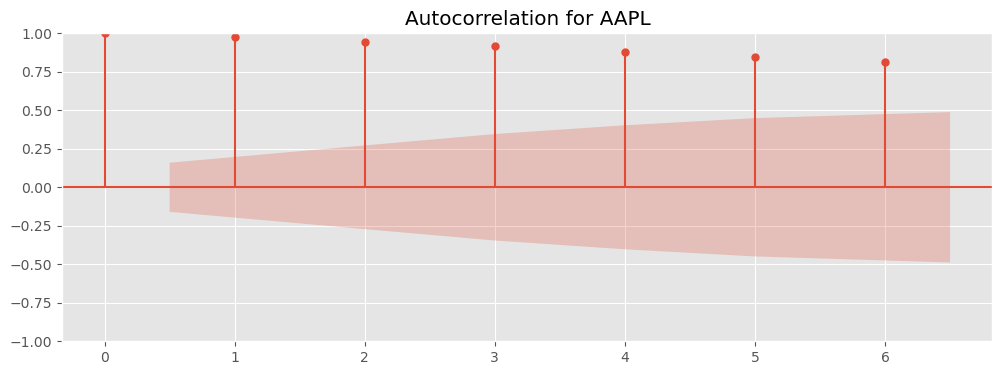

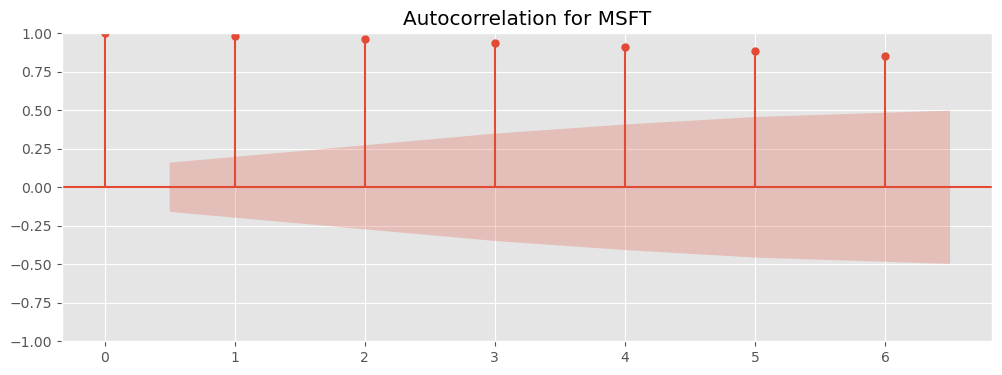

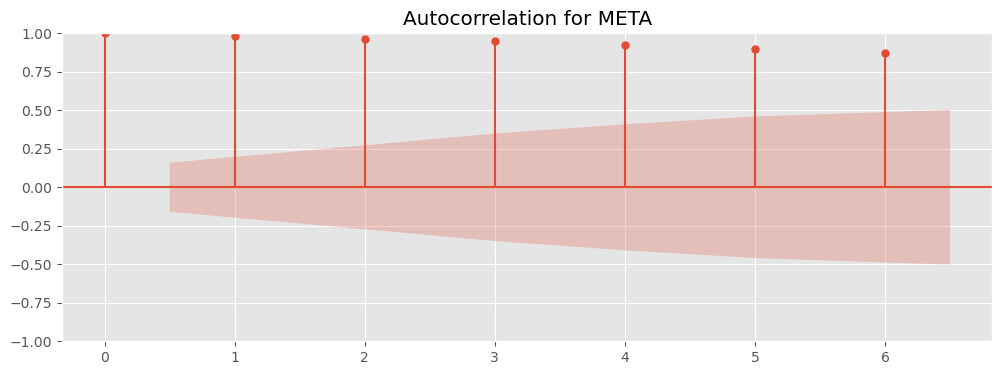

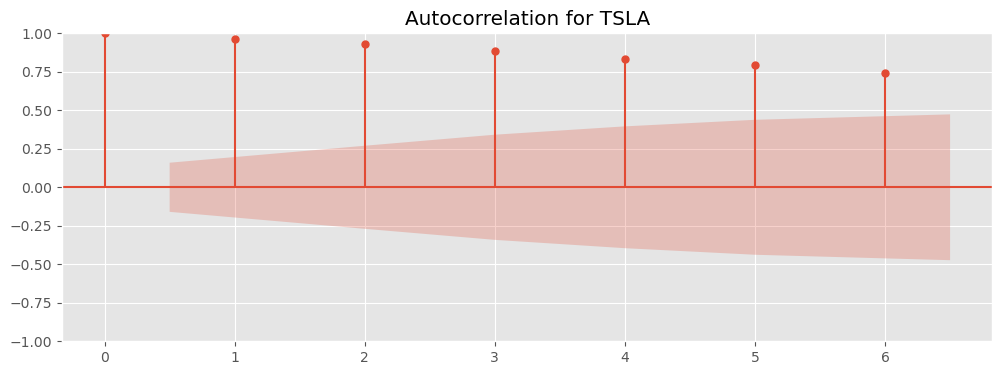

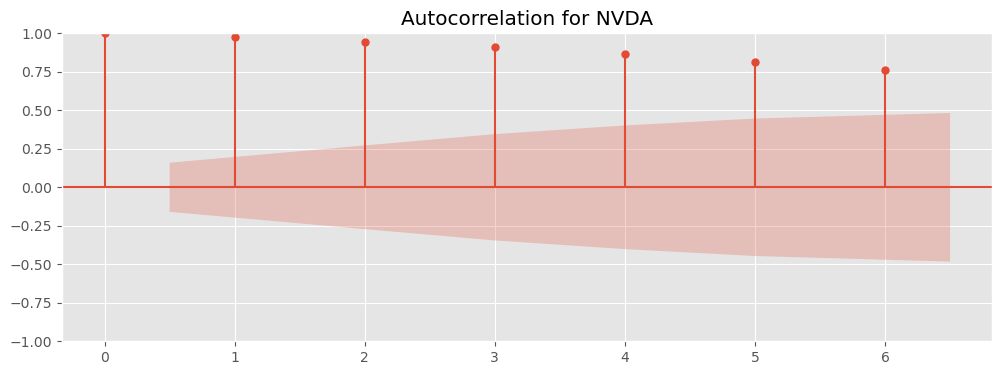

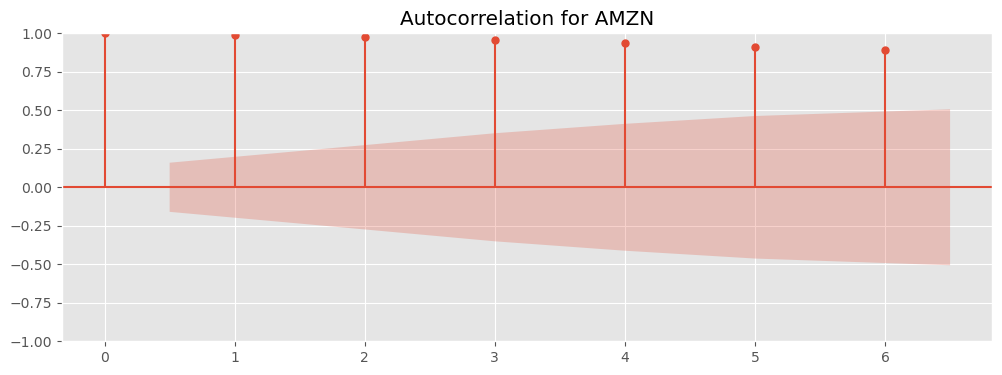

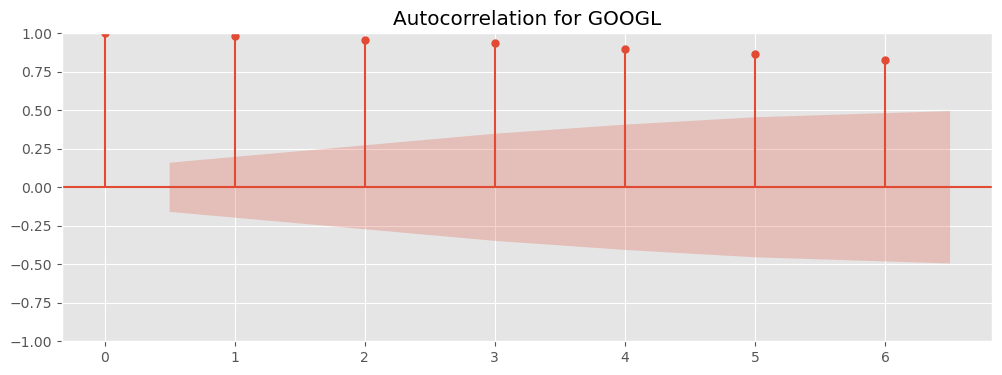

In [20]:
#Visualization 1: 
#Computing the autocorrelation function for each of our 7 companies' time series data with a lag of 6 (half a year)
from statsmodels.graphics.tsaplots import plot_acf

for company in magnificent_seven:
    fig, ax = plt.subplots(figsize = (12, 4))
    plot_acf(final_time_df[company], lags = 6, alpha = 0.05, ax = ax)
    ax.set_title(f"Autocorrelation for {company}")
    plt.show()


### Visualization 1 Analysis: 
A key takeawayfrom all 7 of these autocorrelation function graphs is the fact that there seems to be signficant high autocrrelation values for the first 3 lags which seem to be above 0.9. This suggests that the stock prices for each of these 7 companies have a clear momentum where past upward movements might predict future upward movements (and vice versa for downward movements). In other words, if the stock price for one of these companies were compared to its mean value 6 months prior, there is a high likelihood that it will be up compared to its mean today as well. 

We can also analyze that the autocorrelation values do seem to decrease as the lag increases, which is typical for many economic and financial time series. What this means is that the influence of past values becomes less significant as you move further away in time. Due to the similar pattern these 7 companies in the S&P 500 have, it suggests that they share common market influences or sector-related characteristics that affect their stock prices in a similar way. 

High autocorrelation values at the first few lags suggest momentum. Investors can use this information to implement momentum trading strategies in which they buy stocks that have been rising in the expectation that they will continue to do so in the near term. The fact that these seven companies share common market influences or sector characteristics indicates that they might respond similarly to certain economic events. This insight is crucial for investors looking to diversify their portfolio to manage risk. If an investor's portfolio is heavily weighted in these companies, they may be more exposed to sector-specific risks and less diversified than they might assume. Also the decrease in autocorrelation as the lag increases may suggest a strategic timing for entry and exit points. For instance, if an investor knows that the impact of past prices diminishes after a certain point, they might choose to hold stocks only for the duration where past performance is indicative of future performance.

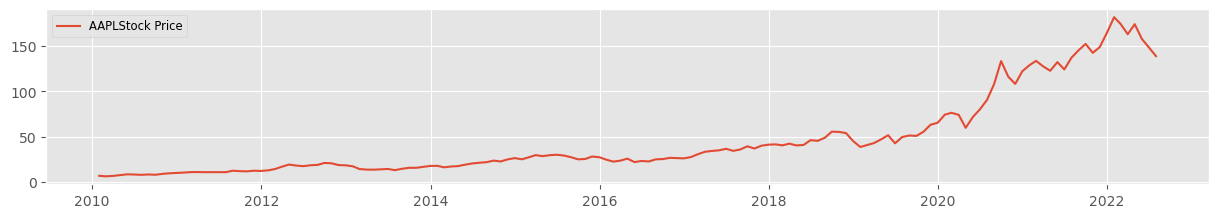

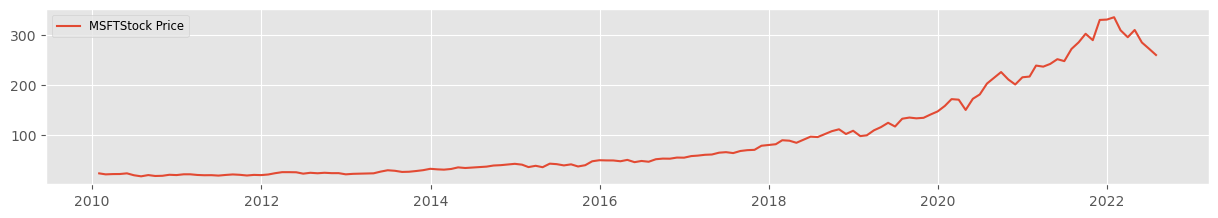

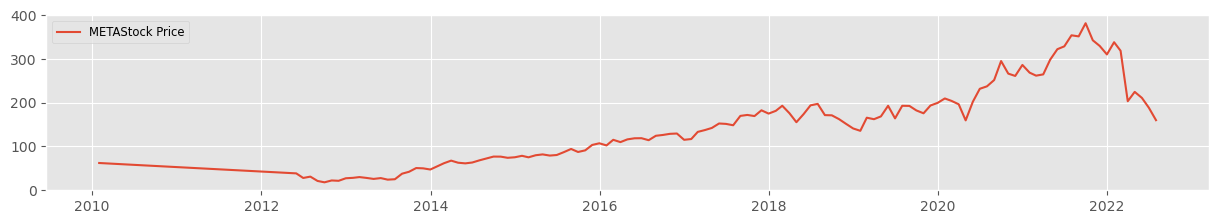

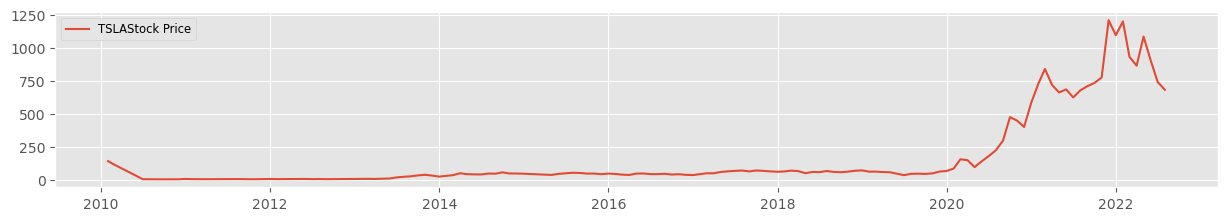

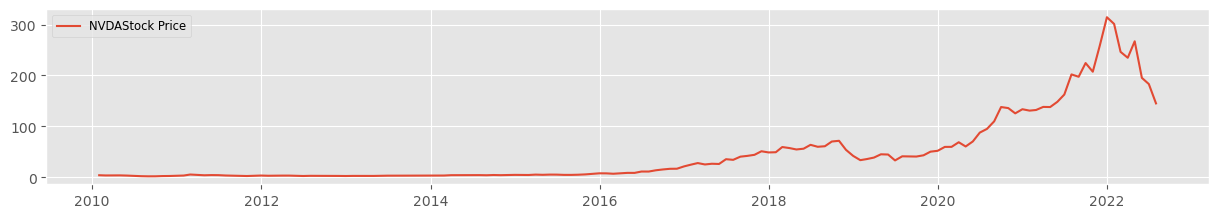

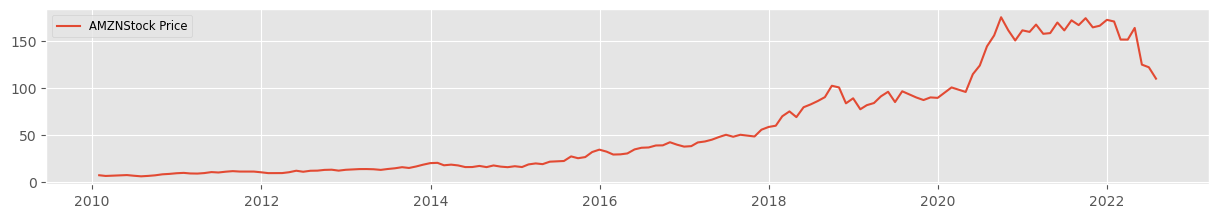

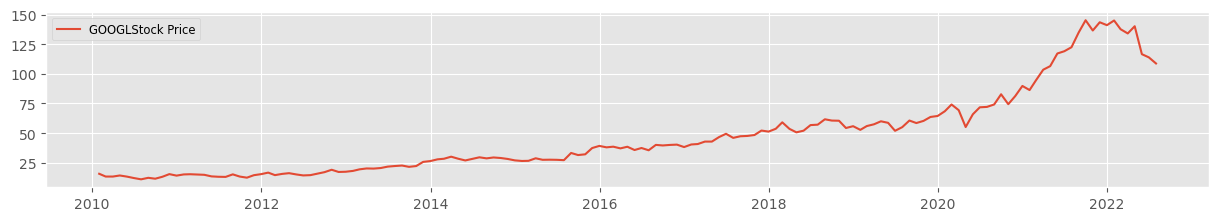

In [21]:
#Visualization 2: Stock prices from 2010 to 2022 for the 7 companies in the "Magnificent 7".
for stock in magnificent_seven:
    plt.subplot(2, 1, 1)
    plt.plot(final_time_df[stock], label = stock + "Stock Price")
    plt.legend(loc = "best", fontsize = "small")
    plt.show()

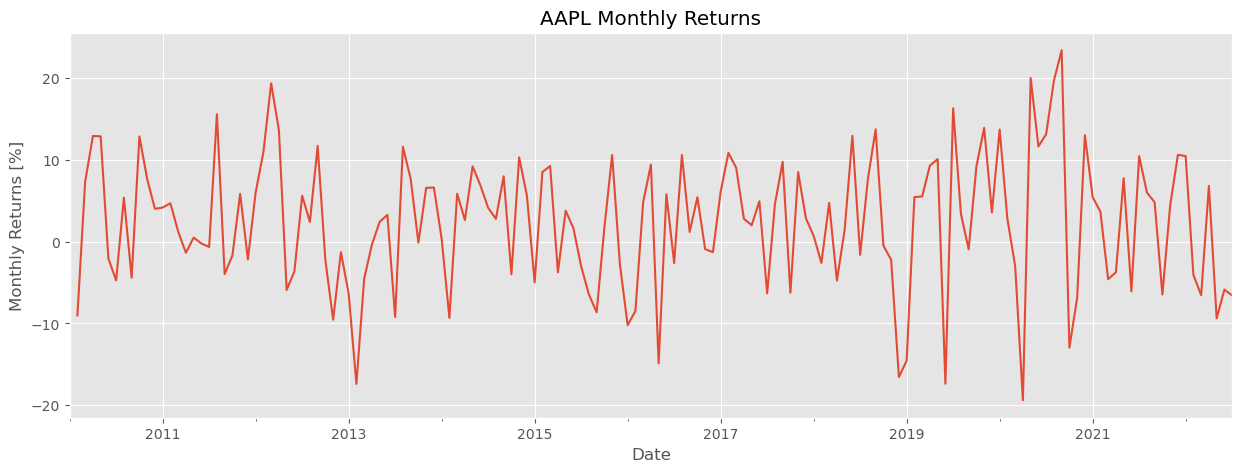

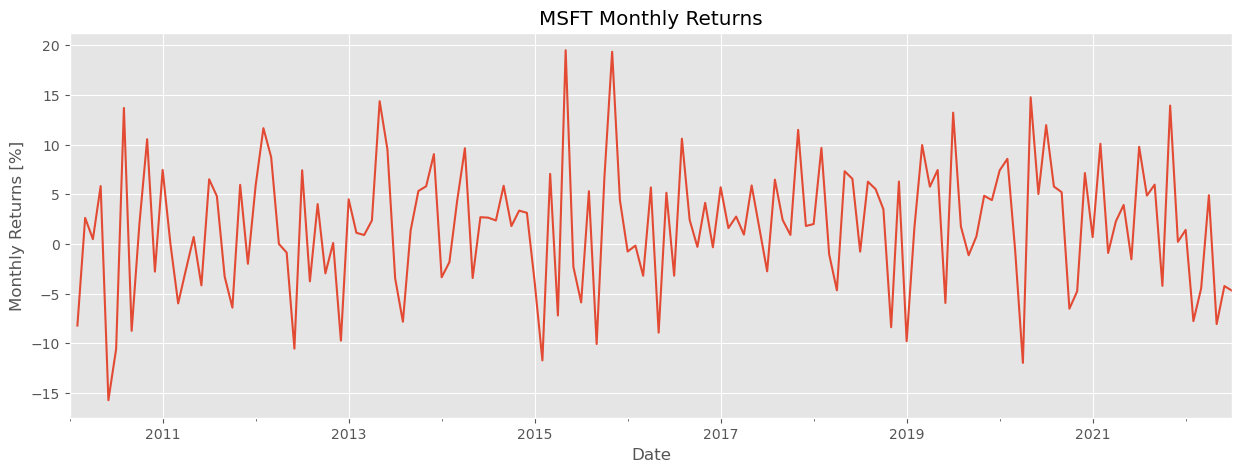

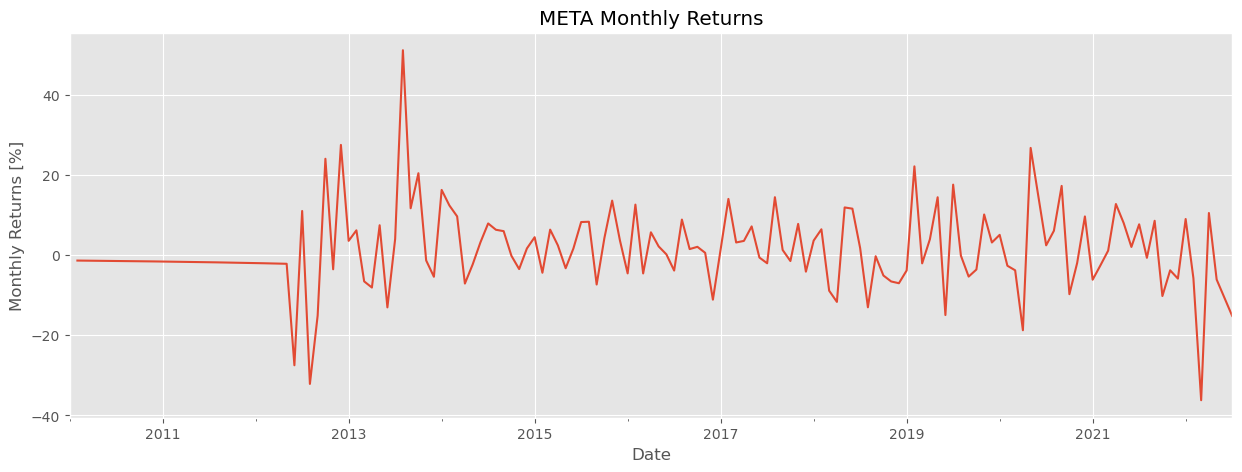

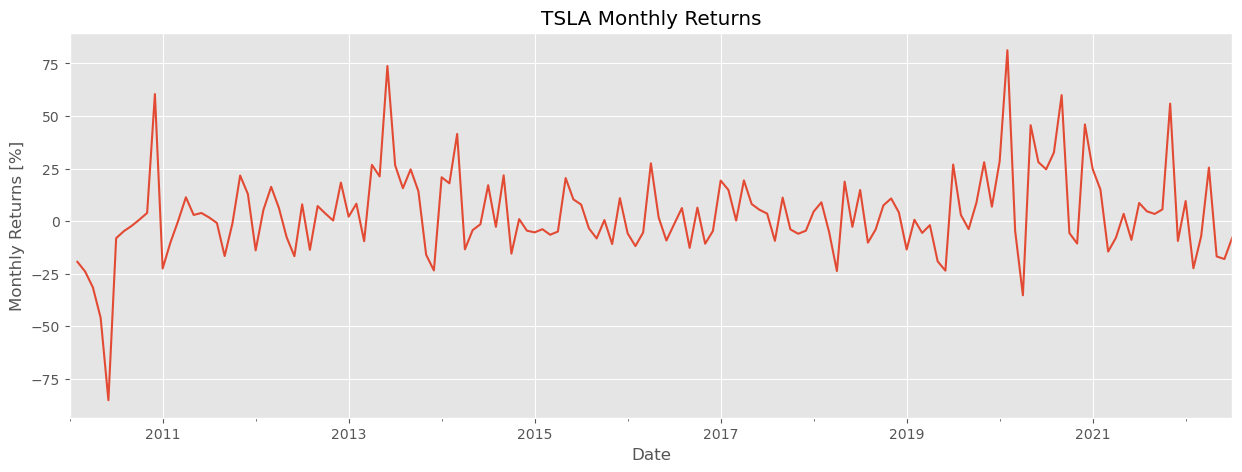

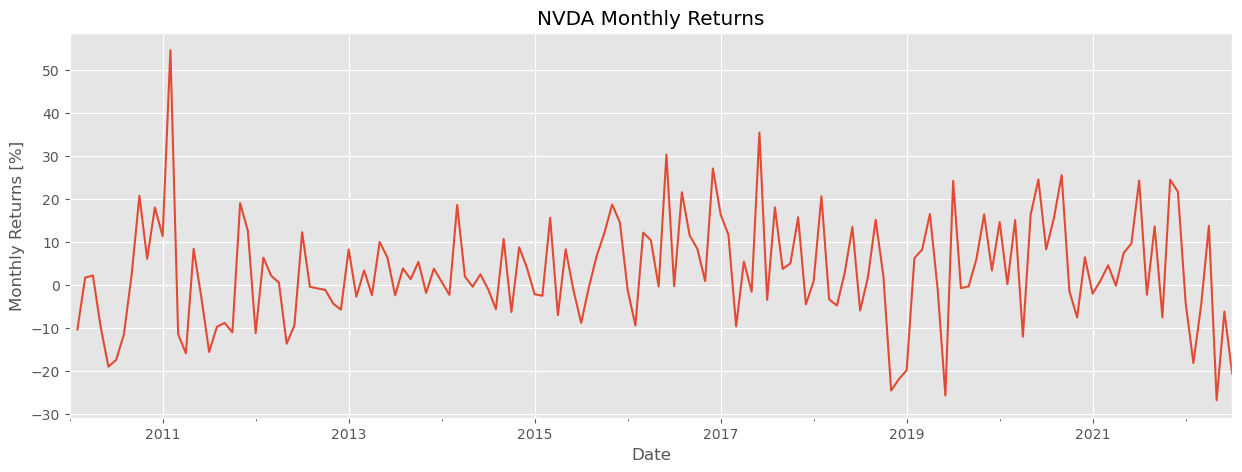

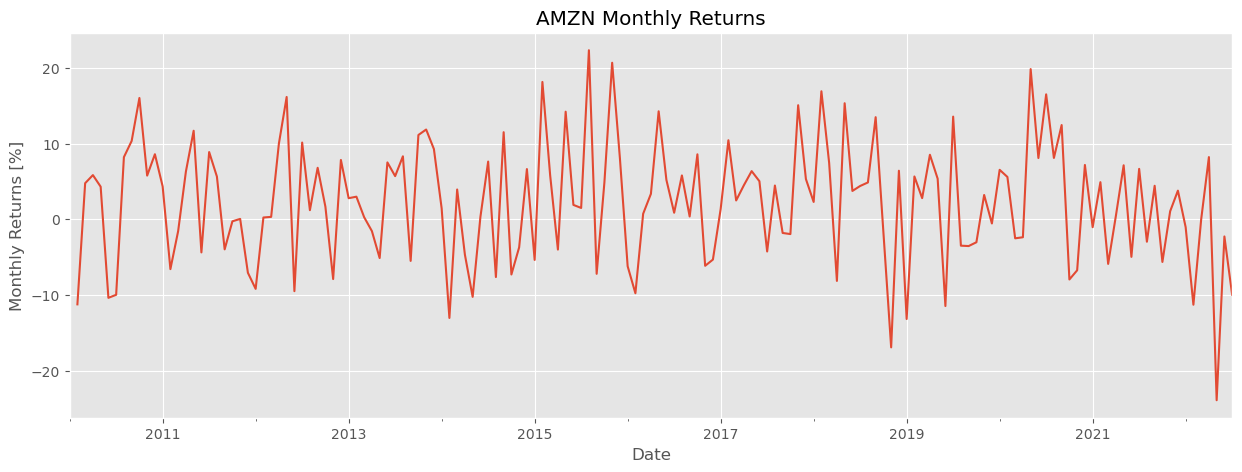

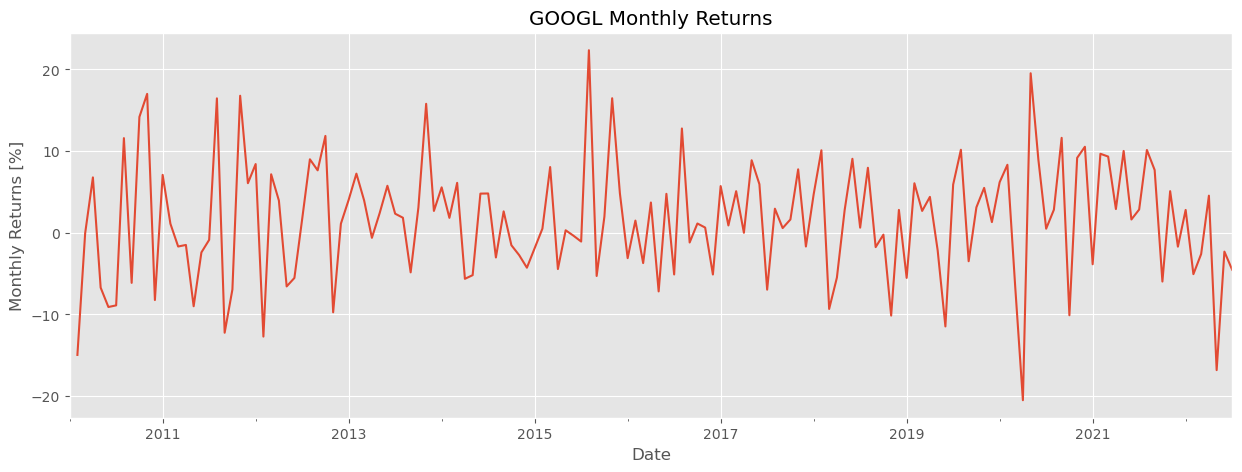

In [22]:
#Visualization 3: Monthly Returns for each stock in the "Magnificent 7"
for company in magnificent_seven:
    final_time_df[f"{company}_Monthly_Returns"] = final_time_df[company].pct_change(periods = 1).mul(100)
    final_time_df[f"{company}_Monthly_Returns"].plot(title = f"{company} Monthly Returns")
    plt.ylabel("Monthly Returns [%]")
    plt.show()

### Visualization 2 and 3 Analysis: 
By looking at these 7 plots of the "Magnificent 7" from visualization 2 over a span from 2010 to 2022, we can clearly identify the general long term upward trends for each of these companys' stock. These indicates growth and accumlation of value over time, which could reflect company's success and market expansion. There are, however, various short term flucuations that do occur at certain periods of time which could reflect market cycles, economic events, product launches, earnings reports, and other newsworthy events that could affect investor sentiment and stock valuation. Investors can also compare the long term growth performances of each company and assess which one has had the most growth relative to their starting values. The upward trend in the stock prices of these companies, combined with the information on autocorrelation from the previous visualization 1, suggests that there is some degree of predicatability in the short term based on the recent past. However, for long term investments, its crucial for investors to consider other factors, such as monthly returns, which portray the short term volatility in which risk averse investors might shy away from. 

Therefore, its crucial to understand and analyze the short term volatility, as visualization 3 yields significant insights into the monthly return volatility of these 7 stocks from 2010 through mid 2021. Extremely large spikes and or drops could be indicators that there have been signficnat market events which should be taken into consideration. A crucial takeaway from this analysis is the fact that although these stock prices may represent a growing positive trend over time, they can also be considered extremely volatile in the short term. For example, company quarterly earnings reports, in which a company reports their quarterly revenue and earning per share, that signficnatly beat or miss expectations can cause large price movements. Similarly, announcements of new products, changes in management, or strategy shifts can also have substantial impacts.

It is also essential for investors to digest macroecnomic events during certain time periods, as they reflect the broader economy as a whole, including stocks across the entire market. There is a noticeable downward trend in the stock prices of all seven analyzed stocks around mid-2022. This period coincides with a significant inflationary spike, with the Consumer Price Index reaching a peak of 9.1% in June 2022. Such a substantial macroeconomic event is likely the cause of the observed decline in stock values during this timeframe.

There are several key insights from both of these visualizations that investors can leverage to make informed decisions about asset allocation and portfolio diversification. The long-term upward trend analysis can be particularly helpful for investors with long-term investment goals. Such investors can use this trend as a basis for buy-and-hold strategies, focusing on the general growth and accumulation of value over time. The timing of short-term volatility can help investors make strategic decisions about when to enter or exit positions. For example, avoiding entry before the release of a company’s quarterly earnings report can mitigate the risk of negative surprises. Autocorrelation insights also suggest some level of predictability in the short term. Investors, especially those who utilize quantitative models, can incorporate autocorrelation in their predictive models to improve their accuracy for short-term trading. 

## Data Visualization - Stock Fundamentals dataset 

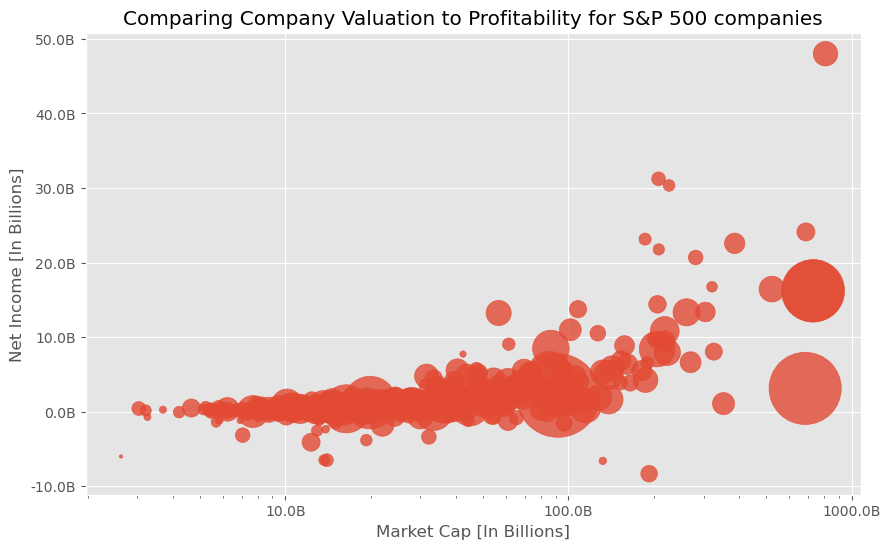

In [23]:
#Visualization 1

from matplotlib.ticker import FuncFormatter

plt.figure(figsize = (10, 6))
plt.scatter(x = fundamentals_df["Market Cap"], y = fundamentals_df["Net Income"], s = np.array(fundamentals_df["Price"]) * 2, alpha = 0.8)

plt.xscale('log')
plt.xlabel("Market Cap [In Billions]")
plt.ylabel("Net Income [In Billions]")
plt.title("Comparing Company Valuation to Profitability for S&P 500 companies")

def billions_formatter(x, pos):
    return '%1.1fB' % (x * 1e-9)


formatterB = FuncFormatter(billions_formatter)
plt.gca().xaxis.set_major_formatter(formatterB)
plt.gca().yaxis.set_major_formatter(formatterB)

plt.grid(True)

plt.show()

### Visualization 1 Analysis:

From analyzing visualization 1, we can analyze and determine that the general positive trend between Market Cap and Net Income for companies in the S&P 500 with a market cap of 100 billion dollars or more indicates that larger companies tend to be more profitable, which might appeal to investors seeking stabiliy. However, the varability also shows that size doesn't guarantee profitability, emphasizing the need for through analysis. The size of the scatter points, which represents stock price, shows the fact that higher priced stocks do not always correlate with higher Market Cap or Net Income which suggests that stock price alone is not a reliable indicator of a company's overall value or profitability. This also highlights the importance of looking beyond the share price when building a portfolio. 

The outliers with significantly high Market Caps and Net Incomes could be seen as less risky to investors because they may be considered to be "blue chip" stocks, which are stocks of highly valued, stable, profitable, and well known companies in their respective industires. Another key insight that this graph highlights is the fact that the differences in Net Income among companies with similar Market Caps could point to differences in operational efficiency, cost structures, or even differing business models, all of which are crucial for investors to understand in order to select stocks that align with their investment strategy and risk profile. 

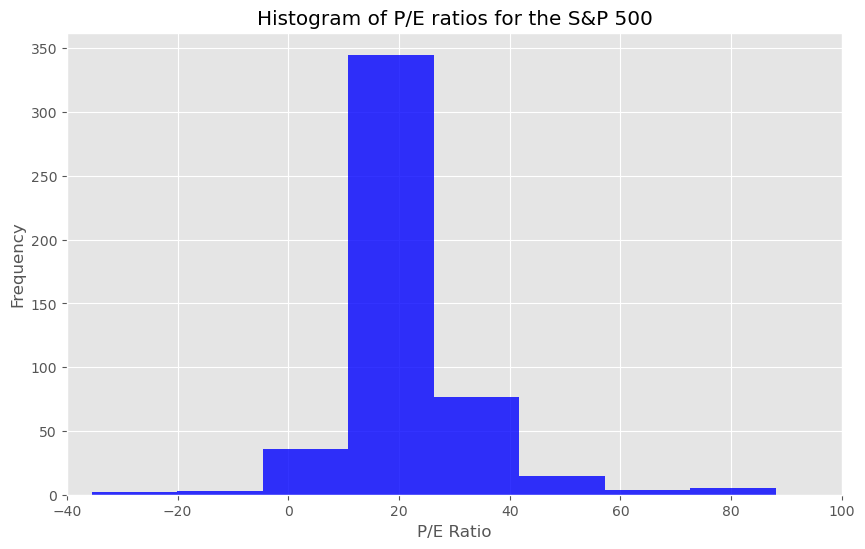

In [24]:
#Visualization 2

plt.figure(figsize = (10, 6))
plt.hist(fundamentals_df["Price/Earnings"], bins = 50, color = "blue", alpha = 0.8)
plt.xlabel("P/E Ratio")
plt.ylabel("Frequency")
plt.title("Histogram of P/E ratios for the S&P 500")

plt.xlim(-40, 100)
plt.grid(True)
plt.show()

### Visualization 2 analysis:

From analyzing visualization 2, we can analyze and determine a large concentration of companies within the S&P 500 possess P/E ratios in the lower ranges, particularly from aroun 15 - 25. This could signal positive insights to investors looking for growth at a reasonable price, as these companies could be undervalued relative to their earnings. There are also the few companies that possess a higher P/E ratio which could indicate they may have high growth expectations, but also carry a degree of risk as the price of their stock is expensive, relative to how much the company earns. Investors may view these as growth-oriented investments, but they must be cautious of overvaluation. In addition to the positive outliers, there are also negative outliers of companies with low P/E ratios. This is not necessarily a negative insight, however, as it could indicate that a company may be undervalued and is trading at a fair value relative to how much the company earns and the market may be overlooking the true earnings potential of the comapny. This can signal to investors who are more value-oriented than growth-oritented that a stock may be trading for a good valuation. However, investors must also be wary about the fact that it could also indicate the company does not have high growth expectations in the future. 

For risk-averse investors, focusing on stocks with moderate P/E ratios may offer a balance between value and growth while avoiding the extremes of overvaluation or potential distress indicated by very high or very low P/E ratios, respectively. This visualization indicates the diversity of valuation within the S&P 500, which suggests a diversified portfolio can be created using a broad selection of stocks from the S&P 500, which can help investors in balancing the overall risk of the portfolio.

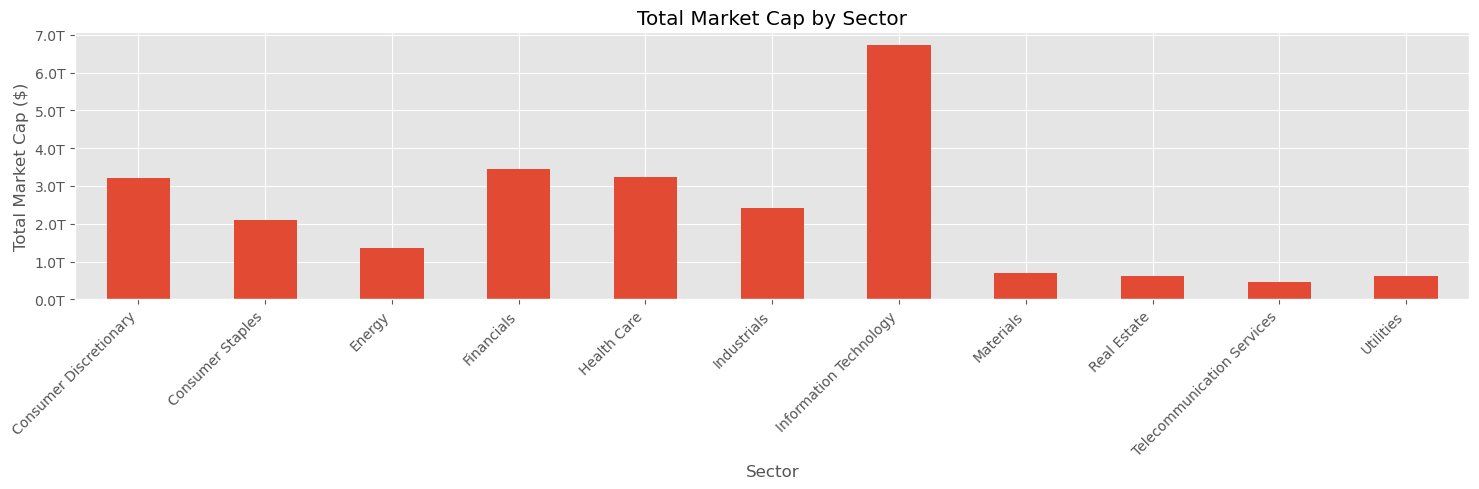

In [25]:
#Visualization 3

sector_market_cap = fundamentals_df.groupby("Sector")["Market Cap"].sum()
sector_market_cap.plot(kind = "bar")

plt.title("Total Market Cap by Sector")
plt.xlabel("Sector")
plt.ylabel("Total Market Cap ($)")
plt.xticks(rotation = 45, ha = "right")

def trillions_formatter(x, pos):
    return '%1.1fT' % (x * 1e-12)
 
formatterT = FuncFormatter(trillions_formatter)
plt.gca().yaxis.set_major_formatter(formatterT)
plt.tight_layout()
plt.show()


### Visualization 3 Analysis:

This visualization represents the difference in total market value of each sector in the S&P 500. This highlights the importance of considering sector weighing in portfolio construction to ensure diversification and manage sector-specific risks. From analzying this bar graph, the technology sector stands out with a much higher market valuation compared to other sectors. These insights may not be as surprising to investors due to the fact that tech companies greatly influence the economy through substantial contributions to economic growth and innovation. However, investors may want to utilize these insights when considering the potential growth for the tech sector as a whole versus its risk profile, as technology stocks can be more volatile than stocks in other sectors during certain economic cycles. 

Other sectors such as Financials and Health Care also have a signficant market value, as they have important contributions to the U.S. economy Investors might view companies in these sectors as key componenets for a balanced portfolio, due to their resilient volataility and stability during certain economic cycles, unlike companies in the tech sector. 

Another crucial takeaway from this visualization is that it could provide investors with insights into how they expose their portfolio to different sectors dependent on their specific investment goals. For example, if their goal is to invest in stable, high-income generating assets, they may invest more of their funds into companies within the Utilities or Consumer Staples, whose valuations may not be as high but yield substantial dividends. Conversely, for growth-oriented goals, sectors like Technology or Health Care may be preferred. 


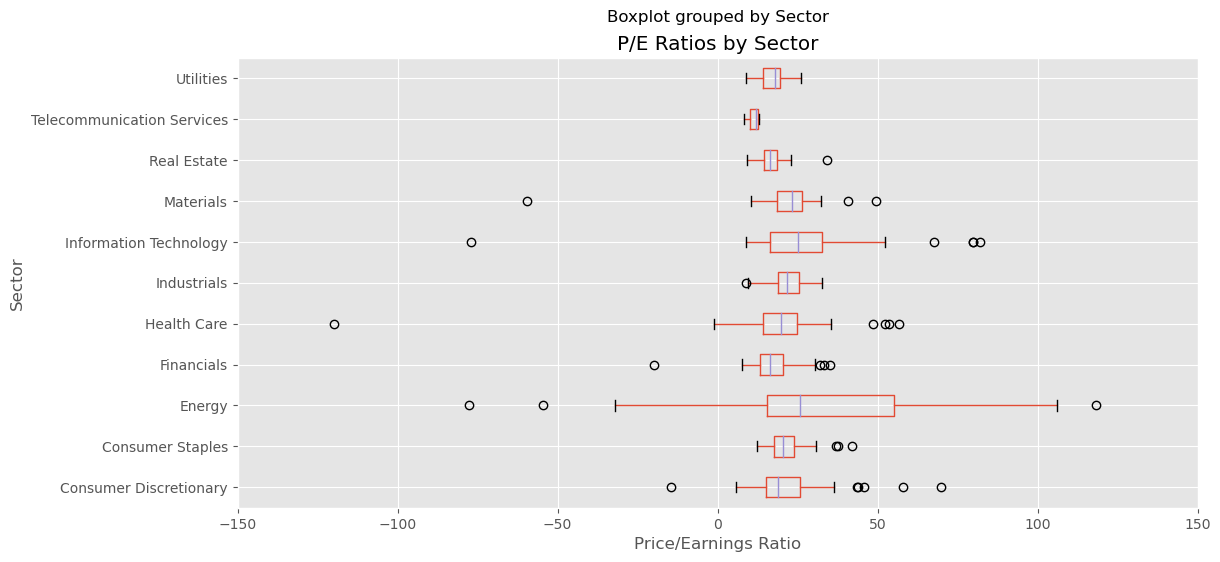

In [26]:
#Visualization 4:

fundamentals_df.boxplot(column = "Price/Earnings", by = "Sector", figsize = (12, 6), vert = False)
plt.title("P/E Ratios by Sector")
plt.xlabel("Price/Earnings Ratio")
plt.xlim(-150, 150)
plt.ylabel("Sector")
plt.show()

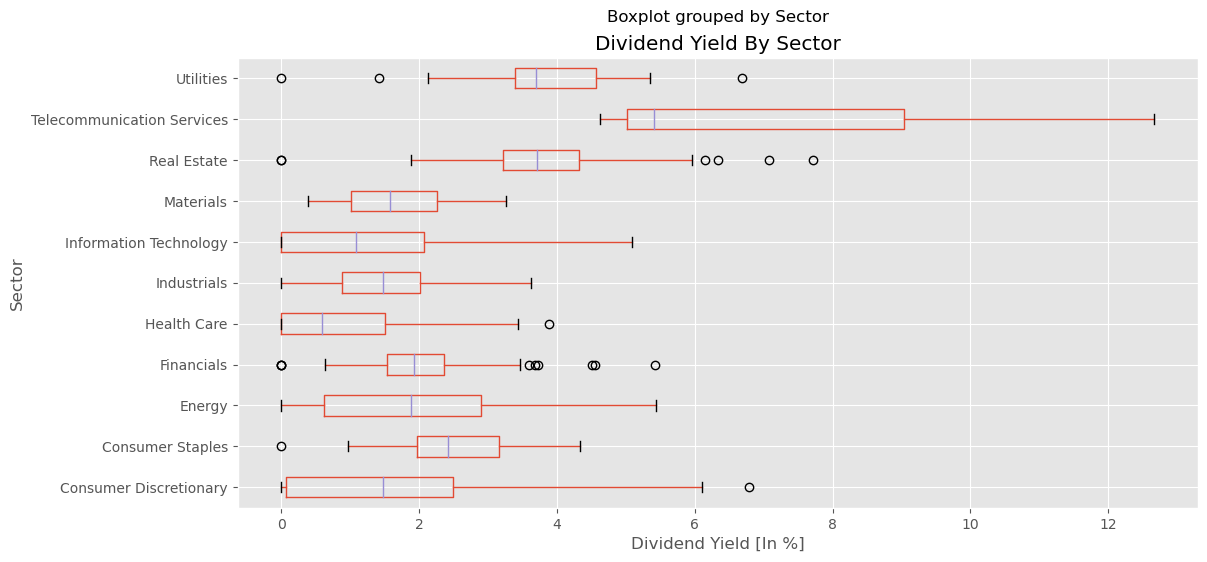

In [27]:
#Visualization 5: 

fundamentals_df.boxplot(column = "Dividend Yield", by = "Sector", vert = False, figsize = (12, 6))
plt.title("Dividend Yield By Sector")
plt.xlabel("Dividend Yield [In %]")
plt.ylabel("Sector")
plt.show()

### Visualization 4 and 5 Analysis:

Visualization 4 is a box and whisker plot that represents the wide variation of P/E ratios by sector, which indicates different valuation levels. This provides investors with insights on whether or not different sectors of the S&P500 have fairly valued stocks as a whole. From analyzing this visualization, we can analyze and determine that the majority of sectors within the S&P500 have a median value around 20 - 25. Sectors with lower median P/E ratios might be more attractive to value-oriented investors, while those with higher median P/E ratios could be perceived as having higher growth expectations. The presence of outliers, which are represented by the circle, in many of the sectors indicate an oppertunity for investors to capitalize on stocks that differ from the sector norm. For constructing a diversified portfolio, an investor might look to allocate investments across sectors with varying P/E ratios to balance growth and risk.

Visualization 5 is another box and whisker plot that shows the variation in dividend yields across different sectors. Sectors like Telecommunications, Utilities, and Real Esate have higher median dividend yields, which could be more attractive to income-focused investors seeking regular cash flows and potentially lower risk profiles. Another potential insight that investors can glean from this visualization is that the technology and health care sectors tend to have lower dividend yields, which may indicate a reinvestment of earnings into the company for growth rather than distribution to shareholders. This could most certainly appeal to growth-oriented investors. 


Key takeaway from both visualzations: An investor looking to construct a diversified portfolio might combine high-dividend-yielding, value oriented stocks from stable sectors like telecommunication services with lower-dividend-yielding, growth oriented stocks from sectors like information technology, aiming for a mix of income and growth. 

# Modeling - Project 2

### Extra Pre-Processing Step
Before we begin modeling, we will use the time series data and two features from our fundamentals_df dataset to feature engeineer a crucial feature referenced as "Beta". This feature represents the volatility in a stock's returns in comparison/relation to the S&P 500 index as a whole. It essentially tells investors how much the price of a given stock in the S&P moves in relation to the movement of the broader S&P 500 index as a whole. A beta above 1 for any given stock tells investors that the stock tends to have a higher voliality than the overall S&P 500 index as a whole and a beta below 1 tells investors that the stock tends to have a lower volaitlity than the overall S&P 500 index as a whole. A value of around 1 tells investors that the stock tends to move intandem with the overall market. 

Higher growth stocks tend to be more volatile than the overall market, as there are large swings in price movements due to the fact that the company is still in it's "growing" phases, which cast uncertainty among investors. Usually stocks with a lower beta (below 1) tend to be blue-chip, valued stocks as their foundations are already set as they are well-known, established consitutents in their respective industrys.

We will also add another very important feature called "Revenue Growth". This feature represents the Fiscal Fourth Quarter (ending on December 31st of every year) Year Over Year (YOY) Revenue Growth in percentage form represented in decimal format (e.g 1.5 represents 150% and -1.5 represents -150%). Revenue growth is a primary indicator of a company's performance. It shows how effectively a company is expanding its operations and market reach. A positive revenue growth rate is often associated with increased market share and improved competitive positioning. It's also metric of high interest to investors seeking to capitalize on high growth opportunites. Investors often look for companies with strong and consistent revenue growth as potential investment opportunities because it suggests that the company is growing and possibly generating more profit. This is also crucial for investors in their diversiciation strategy as revenue growth can provide a quick snapshot of which sectors are expanding rapidly and which are not. This can be particularly useful in a diversified portfolio where investors want to understand where the growth is concentrated.

In [28]:
#Dropping the columns we used before to make our "Magnificent 7" monthly returns graphs
final_time_df.drop(columns = ["AAPL_Monthly_Returns", "TSLA_Monthly_Returns", "META_Monthly_Returns", "MSFT_Monthly_Returns", 
                              "AMZN_Monthly_Returns", "GOOGL_Monthly_Returns", "NVDA_Monthly_Returns"], inplace = True)

In [29]:
#Here we calculate a percentage that represents the overall S&P 500 index return for every monhtly time period in which we recorded the 
#adjusted closing price on a monthly basis for each S&P 500 comapny. To do this, we first sort the "Symbol" feature values in our fundamentals_df
#in alphabetical order and set it as the index which will allow investors to align the "Symbol" feature values in fundamentals_df and their 
#corresponding weights (which represent the weight, in terms of market cap, of how much each company makes up in proportion to the total market 
#cap of the S&P 500 index) with the "Symbol" COLUMN values in final_time_df. We are able to do this because both dataframes now have their 
#respective symbol values in alphabetical order. This allows for each stock's unique computed weights from fundamentals_df to be applied to their
#respective monthly returns from final_time_df which tells investors how much contribution each individual company has in the overall movement/volatility
#in the S&P 500 index. We then sum these final calculations to obtain the overall S&P 500 index volatility. The computed variable "index_returns"
#will be used to calculate the "Beta" feature we are aiming to engineer for fundamentals_df



fundamentals_df.sort_values(by = "Symbol", ascending = True, inplace = True)
fundamentals_df.set_index("Symbol", inplace = True)

weights = fundamentals_df["Market Cap"] / fundamentals_df["Market Cap"].sum()
aligned_weights = weights.reindex(final_time_df.columns)

stock_returns = final_time_df.pct_change()

weighted_returns = stock_returns.mul(aligned_weights, axis = "columns")
index_returns = weighted_returns.sum(axis = 1)

index_returns.drop(index_returns.index[0], inplace = True)
index_returns


Date
2010-02-28   -0.036853
2010-03-31    0.024396
2010-04-30    0.052073
2010-05-31    0.022962
2010-06-30   -0.085310
                ...   
2022-03-31   -0.039011
2022-04-30    0.039342
2022-05-31   -0.066101
2022-06-30   -0.001640
2022-07-31   -0.059662
Length: 150, dtype: float64

In [30]:
final_time_df.shape

(151, 503)

In [31]:
#Here we use dictionary mapping to map each stock's repsective ticker symbol in fundamentals_df to its corresponsing beta value calculated 
#from final_time_df. In final_time_df, we calculated to covariance of each stock's monthly returns with respect to the total S&P 500 index returns
#which tells us how much each stock's returns move in relation to the index. We then calculate the variance of the overall S&P 500 index. Finally,
#to obtain the beta value, we divide the covariance of each stock by the variance of the overall market. The resulting Beta value signifies to 
#investors how volatile a certain stock was, over a span of 12 years ranging 2010 - 2022, in relation to the overall S&P 500 index/market as a 
#whole during that timeframe. 

beta = {}

for stock in final_time_df.columns:
    covariance = np.cov(final_time_df[stock].pct_change().dropna(), index_returns.dropna())[0][1]
    variance = np.var(index_returns.dropna())
    beta[stock] = covariance / variance


fundamentals_df["Beta"] = fundamentals_df.index.map(beta)

fundamentals_df

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Name                  Sector   Price  \
Symbol                                                             
A       Agilent Technologies Inc             Health Care   65.05   
AAL      American Airlines Group             Industrials   48.60   
AAP           Advance Auto Parts  Consumer Discretionary  109.63   
AAPL                  Apple Inc.  Information Technology  155.15   
ABBV                 AbbVie Inc.             Health Care  108.48   
...                          ...                     ...     ...   
XYL                   Xylem Inc.             Industrials   70.24   
YUM              Yum! Brands Inc  Consumer Discretionary   76.30   
ZBH       Zimmer Biomet Holdings             Health Care  115.53   
ZION               Zions Bancorp              Financials   50.71   
ZTS                       Zoetis             Health Care   71.51   

        Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
Symbol                                                                
A                27.45        0.875698            2.10        75.00   
AAL               9.92        0.778210            3.91        59.08   
AAP              19.54        0.218321            6.19       169.55   
AAPL             16.86        1.579541            9.20       180.10   
ABBV             19.41        2.499560            3.29       125.86   
...                ...             ...             ...          ...   
XYL              30.94        1.170079            1.83        76.81   
YUM              27.25        1.797080            4.07        86.93   
ZBH              14.32        0.794834            9.01       133.49   
ZION             17.73        1.480933            2.60        55.61   
ZTS              32.80        0.682372            1.65        80.13   

        52 Week High      Market Cap       EBITDA  Price/Sales  Price/Book  \
Symbol                                                                       
A              49.23   21984606918.0   1094000000     6.493563        4.56   
AAL            39.21   24594852352.0   5761000000     0.580226        6.03   
AAP            78.81    8123611867.0    853941000     1.130106        2.51   
AAPL          131.12  809508034020.0  79386000000     3.458609        5.66   
ABBV           60.05  181386347059.0  10310000000     6.291571       26.14   
...              ...             ...          ...          ...         ...   
XYL            46.86   12915021000.0    722000000     2.726209        5.31   
YUM            62.85   27003303098.0   2289000000     6.313636      212.08   
ZBH           108.17   24454698119.0   2007400000     3.164895        2.39   
ZION           38.43   10670678640.0            0     3.794579        1.42   
ZTS            52.00   35991109776.0   1734000000     9.280896       18.09   

                Net Income      Beta  
Symbol                                
A         709725972.756341  1.394107  
AAL      1978721660.418107  1.559137  
AAP       458680629.907233  1.146430  
AAPL    48001765472.020615  1.234436  
ABBV     5501116167.257651  0.806787  
...                    ...       ...  
XYL        336481896.78246  1.078067  
YUM        1440412104.9654  0.981713  
ZBH      1907182810.111573  1.331521  
ZION      547106378.702426  1.674871  
ZTS       830447925.190882  0.601090  

[505 rows x 14 columns]

In [32]:
#Reading in the CSV file containing our revenue growth metric and extracting only that column. We will then use dictionary mapping to map the 
#proper "Revenue Growth" values for each stock from the revenue_growth_df to the fundamentals_df

revenue_growth_df = pd.read_csv("/Users/zaid/Desktop/ALL JUPYTER NOTEBOOKS/ExtraSP500Info.csv")
revenue_growth_df.rename(columns = {"Revenuegrowth": "Revenue Growth"}, inplace = True)

Revenue_Growth_Dict = revenue_growth_df.set_index("Symbol")["Revenue Growth"].to_dict()
fundamentals_df["Revenue Growth"] = fundamentals_df.index.map(Revenue_Growth_Dict)

fundamentals_df

Name                  Sector   Price  \
Symbol                                                             
A       Agilent Technologies Inc             Health Care   65.05   
AAL      American Airlines Group             Industrials   48.60   
AAP           Advance Auto Parts  Consumer Discretionary  109.63   
AAPL                  Apple Inc.  Information Technology  155.15   
ABBV                 AbbVie Inc.             Health Care  108.48   
...                          ...                     ...     ...   
XYL                   Xylem Inc.             Industrials   70.24   
YUM              Yum! Brands Inc  Consumer Discretionary   76.30   
ZBH       Zimmer Biomet Holdings             Health Care  115.53   
ZION               Zions Bancorp              Financials   50.71   
ZTS                       Zoetis             Health Care   71.51   

        Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
Symbol                                                                
A                27.45        0.875698            2.10        75.00   
AAL               9.92        0.778210            3.91        59.08   
AAP              19.54        0.218321            6.19       169.55   
AAPL             16.86        1.579541            9.20       180.10   
ABBV             19.41        2.499560            3.29       125.86   
...                ...             ...             ...          ...   
XYL              30.94        1.170079            1.83        76.81   
YUM              27.25        1.797080            4.07        86.93   
ZBH              14.32        0.794834            9.01       133.49   
ZION             17.73        1.480933            2.60        55.61   
ZTS              32.80        0.682372            1.65        80.13   

        52 Week High      Market Cap       EBITDA  Price/Sales  Price/Book  \
Symbol                                                                       
A              49.23   21984606918.0   1094000000     6.493563        4.56   
AAL            39.21   24594852352.0   5761000000     0.580226        6.03   
AAP            78.81    8123611867.0    853941000     1.130106        2.51   
AAPL          131.12  809508034020.0  79386000000     3.458609        5.66   
ABBV           60.05  181386347059.0  10310000000     6.291571       26.14   
...              ...             ...          ...          ...         ...   
XYL            46.86   12915021000.0    722000000     2.726209        5.31   
YUM            62.85   27003303098.0   2289000000     6.313636      212.08   
ZBH           108.17   24454698119.0   2007400000     3.164895        2.39   
ZION           38.43   10670678640.0            0     3.794579        1.42   
ZTS            52.00   35991109776.0   1734000000     9.280896       18.09   

                Net Income      Beta  Revenue Growth  
Symbol                                                
A         709725972.756341  1.394107          -0.087  
AAL      1978721660.418107  1.559137          -0.010  
AAP       458680629.907233  1.146430             NaN  
AAPL    48001765472.020615  1.234436           0.021  
ABBV     5501116167.257651  0.806787          -0.054  
...                    ...       ...             ...  
XYL        336481896.78246  1.078067           0.406  
YUM        1440412104.9654  0.981713           0.008  
ZBH      1907182810.111573  1.331521           0.063  
ZION      547106378.702426  1.674871          -0.119  
ZTS       830447925.190882  0.601090           0.085  

[505 rows x 15 columns]

In [33]:
#Filling in the missing revenue growth and beta values for each stock that was not mapped in our fundamentals dataframe with the mean 
#beta value and revenue growth percentage for that stock's particular sector. This is the best general estimation we can give for missing beta 
#values and revenue growth percentages for a stock as these values of a stock leans towards being more indicative and in line with its
#corresponsing sectors' mean value. 

fundamentals_df["Beta"] = fundamentals_df.groupby("Sector")["Beta"].apply(lambda x: x.fillna(x.mean()))
fundamentals_df["Revenue Growth"] = fundamentals_df.groupby("Sector")["Revenue Growth"].apply(lambda x: x.fillna(x.mean()))
print(fundamentals_df.isna().sum())

Name              0
Sector            0
Price             0
Price/Earnings    0
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        0
Net Income        0
Beta              0
Revenue Growth    0
dtype: int64


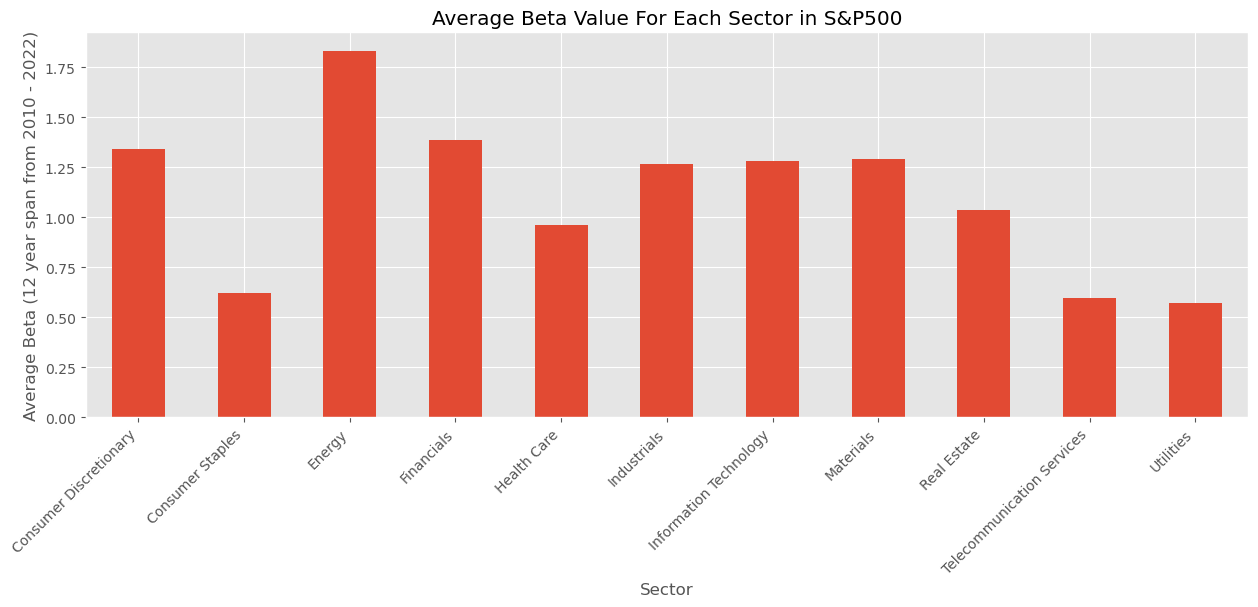

In [34]:
#Beta Value Visualization

sector_beta = fundamentals_df.groupby("Sector")["Beta"].mean()
sector_beta.plot(kind = "bar")

plt.title("Average Beta Value For Each Sector in S&P500")
plt.ylabel("Average Beta (12 year span from 2010 - 2022)")
plt.xlabel("Sector")
plt.xticks(rotation = 45, ha = "right")

plt.show()

### Beta Value Chart Analysis:

Arguably, one of the most important datapoints for investors to crtically analyze is the Beta value of a stock over a certain time period. Here we are building a barchart to show the average beta value over a 12 year span ranging from 2010 - 2022 for each individual sector. Here we can see that the Energy sector tends to be the most volatile sector with a beta value of around 1.75 while the Consumer Staples sector seems to be the least with around a beta value of 0.60. This makes economic sense, as the volatile energy market is heavily influenced by the constantly changing prices of commodities such as oil and natural gas. The energy sector is also more prone and senssitive to economic cycles and geopolitical events, as worldwide events may signficnalty hinder the supply and demand for crucial commodities alongside higher energy consumtion during economic growth periods and vice versa. Consumer staples, on the other hand, refer to the essential goods and services needed by consumers. Because of this, regardless of economic conditions or geopolitical events, these sectors will most likely remain resilient to any market conditions as consumer spending in these sectors is likely to remain in tandem with supply and demand while the opposite may happen in the Energy sector. 

Key insights for investors include the following: An investor looking for growth and willing to accept higher risk might be interested in sectors with higher beta values, such as Energy or Financials, anticipating greater returns during market upswings. For more conservative investors, sectors such as Utilities and Consumer Staples have lower beta values, might be more attractive than sectors with higher beta values, as these lower beta sectors tend to be less volatile and yield potentially lower risks. These sectors may also perform well, especially in a bear market or during times of economic uncertainty, as they tend to be more stable and provide consistent dividends. 

Another crucial take for investors is the fact that this chart can provide crucial insights into portfolio diversification and why its constantly emphasized in the world of investing. By investing in a mix of sectors with varying beta values, an investor can balance potential risk and return. For example, holding both high-beta and low-beta sector stocks could help stabilize portfolio value across different market conditions. During economic booms, an investor that utilizes this strategy can reap the rewards from increased growth in higher beta valued stocks. In contrast, during economic slowdowns, investors can signficantly hedge against losses incurred from higher beta valued stocks by reaping the consistent stability and income resulting from the ownership of lower beta valued stocks. High-beta sectors may also be more affected by sector-specific risks, and this visualization can help investors identify which sectors they need to monitor more closely for news that could affect stock prices.

Knowledge of sector betas can be useful for tactical asset allocation, such as market timing and sector rotation strategies. Investors might overweight sectors with higher beta in a bullish market for greater gains, while favoring lower-beta sectors in a bearish market to protect their portfolios.

### Unsupervised Learning (Clustering):

Here we perform Unsupervised Learning (Hierarchical Clustering) as an extra, final pre-processing step to better understand the natural hierarchical relationships between our independent variables. Before using our domain knowledge to pre-define and assign observations (specific stocks) to one of our six different target categories, (High Growth, Low Growth, Volatile, Dividend Paying, Undervalued, and No Insights) by assigning each of our observations into one of K clusters, we can get an initial understanding of the natural similarities of certain features' values for our observations and by assigning them in hierarchical groupings which can confirm whatever pre-defined domain knowledge we may have when determing whether a stock falls into one of our target categories. For example, if we have the hypothesis that a high P/E ratio alongside a high EPS could signify that a stock is of "High Growth", we could perform hierarchical clustering to analyze if one or more of our K clusters contain observations with a high P/E ratio and high EPS. We could then make the conclusion that a stock with a high P/E ratio and high EPS would most likely be of "High Growth" because of the natural hierarchical similarities in these features' values.


If we can identify K clusters that contain observations in which the feature values, we believe pertain to a certain category, are higher than the mean value in those K clusters, we will pre-define a function that checks for those said conditions for each observation to assign the said observation to a certain category within our target feature. We will also use condtions based on the return rates of stocks which will be based on our time series dataset (final_time_df) to pre-define our functions. However, since those observations contain stock closing price values that are based on a monthly basis, it would not practical to cluster them. So we will instead use our domain knowledge, based on certain return rates, to determine certain conditions for our pre-defined functions based on the crtieria required for certain categories within our target feature. 

Here are the steps we will take before we feature engineer our target feature:
1. If features are correlated and leading to grouping of observations into a given cluster. 
2. Does a correlation of said features mean the stock represents a unique characteristic (Preferable my target variable labels)
3. If a correlation does represent a unique characterictic, what are the exact thresholds for each feature to classifcy it into the unique characteristic 


In [35]:
#Here we one hot encode our "Sector" feature and combine those dummy columns with our main fundamentals dataset. We then drop the "Sector"
#categorical feature and "Name" feature as it is irrelavent for our analysis. 

sector_dummies = pd.get_dummies(fundamentals_df, columns = ["Sector"], drop_first = True, prefix = ["dummy_Sector"])
fundamentals_df_with_dummies = pd.concat([fundamentals_df, sector_dummies], axis = 1)
fundamentals_df_with_dummies.drop(columns = ["Sector", "Name"], axis = 1, inplace = True)

fundamentals_df_with_dummies

Price  Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
Symbol                                                                        
A        65.05           27.45        0.875698            2.10        75.00   
AAL      48.60            9.92        0.778210            3.91        59.08   
AAP     109.63           19.54        0.218321            6.19       169.55   
AAPL    155.15           16.86        1.579541            9.20       180.10   
ABBV    108.48           19.41        2.499560            3.29       125.86   
...        ...             ...             ...             ...          ...   
XYL      70.24           30.94        1.170079            1.83        76.81   
YUM      76.30           27.25        1.797080            4.07        86.93   
ZBH     115.53           14.32        0.794834            9.01       133.49   
ZION     50.71           17.73        1.480933            2.60        55.61   
ZTS      71.51           32.80        0.682372            1.65        80.13   

        52 Week High      Market Cap       EBITDA  Price/Sales  Price/Book  \
Symbol                                                                       
A              49.23   21984606918.0   1094000000     6.493563        4.56   
AAL            39.21   24594852352.0   5761000000     0.580226        6.03   
AAP            78.81    8123611867.0    853941000     1.130106        2.51   
AAPL          131.12  809508034020.0  79386000000     3.458609        5.66   
ABBV           60.05  181386347059.0  10310000000     6.291571       26.14   
...              ...             ...          ...          ...         ...   
XYL            46.86   12915021000.0    722000000     2.726209        5.31   
YUM            62.85   27003303098.0   2289000000     6.313636      212.08   
ZBH           108.17   24454698119.0   2007400000     3.164895        2.39   
ZION           38.43   10670678640.0            0     3.794579        1.42   
ZTS            52.00   35991109776.0   1734000000     9.280896       18.09   

        ...  dummy_Sector_Consumer Staples  dummy_Sector_Energy  \
Symbol  ...                                                       
A       ...                              0                    0   
AAL     ...                              0                    0   
AAP     ...                              0                    0   
AAPL    ...                              0                    0   
ABBV    ...                              0                    0   
...     ...                            ...                  ...   
XYL     ...                              0                    0   
YUM     ...                              0                    0   
ZBH     ...                              0                    0   
ZION    ...                              0                    0   
ZTS     ...                              0                    0   

        dummy_Sector_Financials  dummy_Sector_Health Care  \
Symbol                                                      
A                             0                         1   
AAL                           0                         0   
AAP                           0                         0   
AAPL                          0                         0   
ABBV                          0                         1   
...                         ...                       ...   
XYL                           0                         0   
YUM                           0                         0   
ZBH                           0                         1   
ZION                          1                         0   
ZTS                           0                         1   

        dummy_Sector_Industrials  dummy_Sector_Information Technology  \
Symbol                                                                  
A                              0                                    0   
AAL                            1                                    0   
AAP     

In [36]:
#Deleting duplicate columns as there are duplicate columns present as a result of pd.concat()

fundamentals_df_with_dummies = fundamentals_df_with_dummies.T.drop_duplicates().T
fundamentals_df_with_dummies.columns

Index(['Price', 'Price/Earnings', 'Dividend Yield', 'Earnings/Share',
       '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA', 'Price/Sales',
       'Price/Book', 'Net Income', 'Beta', 'Revenue Growth',
       'dummy_Sector_Consumer Staples', 'dummy_Sector_Energy',
       'dummy_Sector_Financials', 'dummy_Sector_Health Care',
       'dummy_Sector_Industrials', 'dummy_Sector_Information Technology',
       'dummy_Sector_Materials', 'dummy_Sector_Real Estate',
       'dummy_Sector_Telecommunication Services', 'dummy_Sector_Utilities'],
      dtype='object')

In [37]:
#Scaling the entire fundamentals dataset by standardizing it, ensuring each features' values have a mean of 0 and standard deviation of 1. 
#This is crucial before performing clustering, as we use a distance metric between observations' features' values when clustering observations into 
#K clusters to determine the similiarties between observations' features' values. If there are outliers present in the dataset, (which there are) 
#they will dominate the distance calculations, thusmaking the clusters we obtain unreliable and misleading. We then build a new dataframe with
#the scaled values which will be used to initially cluster our data points. 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(fundamentals_df_with_dummies)

scaled_fundamentals_df = pd.DataFrame(scaled, columns = fundamentals_df_with_dummies.columns, index = fundamentals_df_with_dummies.index)
scaled_fundamentals_df


Price  Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
Symbol                                                                          
A      -0.288773        0.065531       -0.664362       -0.290978    -0.306838   
AAL    -0.411265       -0.360633       -0.727844        0.027494    -0.409410   
AAP     0.043184       -0.126766       -1.092428        0.428662     0.302343   
AAPL    0.382141       -0.191918       -0.206039        0.958274     0.370316   
ABBV    0.034621       -0.129926        0.393052       -0.081596     0.020850   
...          ...             ...             ...             ...          ...   
XYL    -0.250127        0.150374       -0.472669       -0.338484    -0.295177   
YUM    -0.205002        0.060668       -0.064384        0.055646    -0.229974   
ZBH     0.087117       -0.253667       -0.717019        0.924844     0.070010   
ZION   -0.395553       -0.170768       -0.270250       -0.203002    -0.431767   
ZTS    -0.240670        0.195592       -0.790251       -0.370156    -0.273786   

        52 Week High  Market Cap     EBITDA  Price/Sales  Price/Book  ...  \
Symbol                                                                ...   
A          -0.324809   -0.302963  -0.365293     0.738239   -0.109353  ...   
AAL        -0.419677   -0.273948   0.317639    -0.972458   -0.092812  ...   
AAP        -0.044751   -0.457041  -0.400421    -0.813381   -0.132421  ...   
AAPL        0.450512    8.451094  11.091345    -0.139757   -0.096975  ...   
ABBV       -0.222367    1.468936   0.983304     0.679804    0.133477  ...   
...              ...         ...        ...          ...         ...  ...   
XYL        -0.347248   -0.403780  -0.419729    -0.351636   -0.100914  ...   
YUM        -0.195858   -0.247175  -0.190426     0.686187    2.225778  ...   
ZBH         0.233225   -0.275505  -0.231633    -0.224727   -0.133771  ...   
ZION       -0.427062   -0.428728  -0.525381    -0.042563   -0.144686  ...   
ZTS        -0.298584   -0.147268  -0.271641     1.544600    0.042894  ...   

        dummy_Sector_Consumer Staples  dummy_Sector_Energy  \
Symbol                                                       
A                           -0.268676            -0.260102   
AAL                         -0.268676            -0.260102   
AAP                         -0.268676            -0.260102   
AAPL                        -0.268676            -0.260102   
ABBV                        -0.268676            -0.260102   
...                               ...                  ...   
XYL                         -0.268676            -0.260102   
YUM                         -0.268676            -0.260102   
ZBH                         -0.268676            -0.260102   
ZION                        -0.268676            -0.260102   
ZTS                         -0.268676            -0.260102   

        dummy_Sector_Financials  dummy_Sector_Health Care  \
Symbol                                                      
A                     -0.394470                  2.697904   
AAL                   -0.394470                 -0.370658   
AAP                   -0.394470                 -0.370658   
AAPL                  -0.394470                 -0.370658   
ABBV                  -0.394470                  2.697904   
...                         ...                       ...   
XYL                   -0.394470                 -0.370658   
YUM                   -0.394470                 -0.370658   
ZBH                   -0.394470                  2.697904   
ZION                   2.535048                 -0.370658   
ZTS                   -0.394470                  2.697904   

        dummy_Sector_Industrials  dummy_Sector_Information Technology  \
Symbol                                                                  
A                      -0.391111                            -0.401148   
AAL                     2.556817                            -0.401148   
AAP                    -0.391111                            -0

#### K Clusters determination:

Here we build a dendrogram, which serves as a visual representation of the hierarchical clustering process, illustrating the order and distance at which observations merge into clusters. This visual tool is absolutely critical for determining the optimal number of K clusters for the dataset. To determine the adequate number of K clusters, we examine the dendrogram to understand the hierarchy and similarity of feature values among observations, typically using the Euclidean distance as a measure. The clustering process involves a linkage criterion, such as Ward’s method among many others, which minimizes the total within-cluster variance. At each step, the two clusters that are most similar based on that criterion are merged, continuing until all observations belong to a single cluster. However, having a single cluster encompassing all observations is not practical for meaningful segmentation. Instead, we identify the number of clusters by looking for the longest uninterrupted vertical lines in the dendrogram, which suggest a significant separation between distinct clusters. The number of these significant vertical gaps before a merge indicates a natural grouping in the data, guiding us to set K for our actual clustering model. To precisely identify the number of clusters, we can draw a horizontal line at a height where it crosses the longest vertical lines (i.e., the largest distance without intersecting a horizontal merge line). The number of vertical lines intersected by this horizontal line represents the number of clusters that would be formed if we cut the dendrogram at that height.

#### Building our model to perform Hierchical Clustering:

For our distance metric between data points, we use the Euclidean Distance metric to determine the distance between observations' features' values. This is crucial as it quantifies how similar or dissimilar two data points or entities are. It defines the "space" in which the data exists and how distances within that space are calculated. Then we use the ward linkage method/criterion to determine how smaller clusters should be merged into larger clusters all the way up the hierachical structure. Once distances between all pairs of data points or existing clusters are calculated, the linkage criterion determines how to use these distances to merge the entities into larger clusters. It essentially defines what the "distance" between clusters should be considered as, based on the distances between individual points in those clusters.

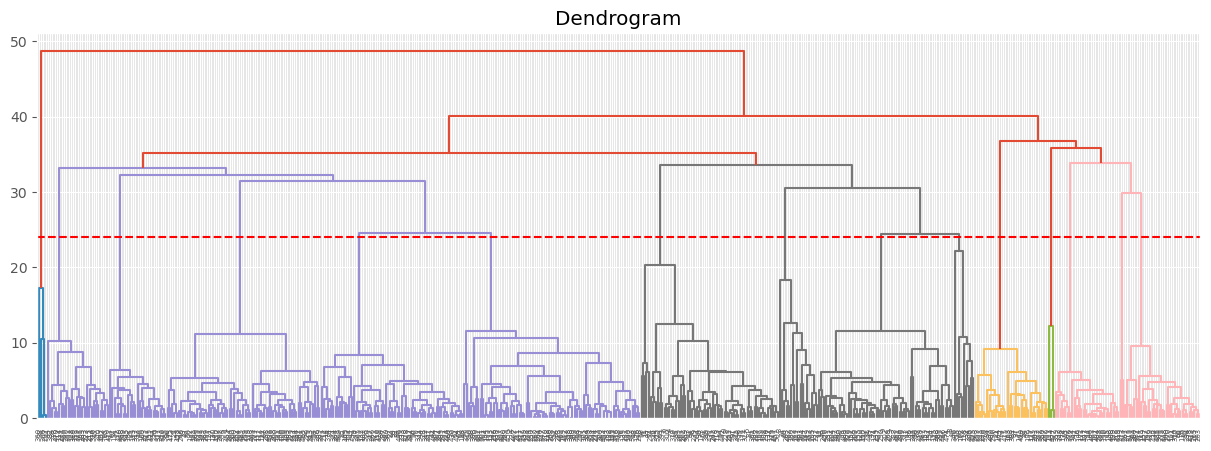

In [38]:
#Building the Dendrogram. Here we can see at around y = 24, we can obtain the best line that crosses through the longest vertical lines for each
#hierchial structure for every observation. In total, we count 15 meaningful clusters to cluster all of our observations into. 

import scipy.cluster.hierarchy as shc 

plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(scaled_fundamentals_df, method = "ward")) 
plt.axhline(y = 24, color = "r", linestyle = "--")

In [39]:
#Building the model to perform Hierarchical Clustering. We use AgglomerativeClustering, which is a type of Hierachical Clustering algorithm from
#the Sci-kit learn machine learning library. 

from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = 15, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(scaled_fundamentals_df)
clusters

array([ 1, 10,  5,  2,  1,  1,  1,  6,  6,  6, 11,  6,  6,  6, 13, 13, 13,
        1, 14,  1, 14,  7, 14, 14,  6,  9,  1, 10, 14, 10,  1,  6,  0, 10,
       14,  1, 14,  7,  3,  8,  6,  1, 14, 10,  8,  8,  9,  6,  5,  7, 10,
        6,  7,  6,  9, 13, 14, 10,  1, 10,  2,  1, 14,  5,  1, 14, 11,  5,
        0,  1, 14,  1,  9,  1,  2,  1,  5,  7, 14,  6, 11,  1, 10, 14,  7,
       14,  5,  7,  5,  6,  1,  1,  9, 14, 11,  8, 10,  1,  1, 14, 11, 11,
       14,  2, 14,  5, 10, 13,  1, 13, 14,  8, 10,  1,  8, 11, 11, 11,  0,
        2,  6, 10, 10,  4,  6,  6, 11,  2,  8, 13, 10, 10, 14,  5,  1,  5,
        1,  2,  5,  5,  5,  7,  5, 10, 11,  7,  5, 13, 13,  1,  8,  9,  6,
        6,  6,  9, 13, 10, 13, 11,  9, 10,  0,  7,  7,  8, 13,  1,  7, 14,
       10, 13,  1,  1, 13, 10,  5,  7,  5, 10,  2, 10,  9, 10, 13,  6,  6,
        6, 14,  5,  6, 10, 10,  9,  5,  5,  7,  8, 10, 10, 10,  7,  1, 11,
        6,  2,  3,  3,  5,  6,  5,  5, 14,  5, 10,  8,  5, 14,  5,  1,  7,
        7,  2,  8, 14, 10

In [40]:
#Creating a new column called "Cluster Labels" which assigns each observation to its designated cluster 

fundamentals_df["Cluster_Labels"] = clusters
fundamentals_df

Name                  Sector   Price  \
Symbol                                                             
A       Agilent Technologies Inc             Health Care   65.05   
AAL      American Airlines Group             Industrials   48.60   
AAP           Advance Auto Parts  Consumer Discretionary  109.63   
AAPL                  Apple Inc.  Information Technology  155.15   
ABBV                 AbbVie Inc.             Health Care  108.48   
...                          ...                     ...     ...   
XYL                   Xylem Inc.             Industrials   70.24   
YUM              Yum! Brands Inc  Consumer Discretionary   76.30   
ZBH       Zimmer Biomet Holdings             Health Care  115.53   
ZION               Zions Bancorp              Financials   50.71   
ZTS                       Zoetis             Health Care   71.51   

        Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
Symbol                                                                
A                27.45        0.875698            2.10        75.00   
AAL               9.92        0.778210            3.91        59.08   
AAP              19.54        0.218321            6.19       169.55   
AAPL             16.86        1.579541            9.20       180.10   
ABBV             19.41        2.499560            3.29       125.86   
...                ...             ...             ...          ...   
XYL              30.94        1.170079            1.83        76.81   
YUM              27.25        1.797080            4.07        86.93   
ZBH              14.32        0.794834            9.01       133.49   
ZION             17.73        1.480933            2.60        55.61   
ZTS              32.80        0.682372            1.65        80.13   

        52 Week High      Market Cap       EBITDA  Price/Sales  Price/Book  \
Symbol                                                                       
A              49.23   21984606918.0   1094000000     6.493563        4.56   
AAL            39.21   24594852352.0   5761000000     0.580226        6.03   
AAP            78.81    8123611867.0    853941000     1.130106        2.51   
AAPL          131.12  809508034020.0  79386000000     3.458609        5.66   
ABBV           60.05  181386347059.0  10310000000     6.291571       26.14   
...              ...             ...          ...          ...         ...   
XYL            46.86   12915021000.0    722000000     2.726209        5.31   
YUM            62.85   27003303098.0   2289000000     6.313636      212.08   
ZBH           108.17   24454698119.0   2007400000     3.164895        2.39   
ZION           38.43   10670678640.0            0     3.794579        1.42   
ZTS            52.00   35991109776.0   1734000000     9.280896       18.09   

                Net Income      Beta  Revenue Growth  Cluster_Labels  
Symbol                                                                
A         709725972.756341  1.394107          -0.087               1  
AAL      1978721660.418107  1.559137          -0.010              10  
AAP       458680629.907233  1.146430           0.060               5  
AAPL    48001765472.020615  1.234436           0.021               2  
ABBV     5501116167.257651  0.806787          -0.054               1  
...                    ...       ...             ...             ...  
XYL        336481896.78246  1.078067           0.406              10  
YUM        1440412104.9654  0.981713           0.008               5  
ZBH      1907182810.111573  1.331521           0.063               1  
ZION      547106378.702426  1.674871          -0.119              14  
ZTS       830447925.190882  0.601090           0.085               1  

[505 rows x 16 columns]

In [41]:
#Obtaining the mean values of the features (within each cluster) we will be using to identify clusters that match our pre-defined conditions
#(domain knowledge) according to the critiera (domain knowledge) required for the given category within our target variable. Essentially, we are
#identifying the cluster/s that represent/s meaningful similarities using these features. 

cluster_means = fundamentals_df.groupby("Cluster_Labels")[["Beta", "Earnings/Share", "Price/Earnings", "Market Cap", "Dividend Yield", 
                                                           "EBITDA", "Price/Sales", "Price/Book", "Net Income", "Revenue Growth"]].mean()
cluster_means


Beta  Earnings/Share  Price/Earnings           Market Cap  \
Cluster_Labels                                                                  
0               1.454421        0.304444      243.268889   61189759632.777779   
1               0.977222        6.602667       24.375333   52641257221.583336   
2               1.260107        4.615882       19.287059  309998396614.764709   
3               1.254424       23.340000       98.047500      560012586967.75   
4               0.597960        4.426667       11.190000  151014247968.333344   
5               1.351380        2.640779       20.533377   22150161880.870129   
6               1.268424        2.473390       22.069492   39028316609.677963   
7               1.046750        2.446563       16.916875       18929488945.25   
8               1.877082       -2.090370       16.198889   24613288784.962963   
9               1.292522        4.932000       20.542400   27692010366.040001   
10              1.267311        5.344030       21.494328   35993151836.328362   
11              0.614445        3.634545       21.951212   58590779281.181816   
12              1.090357        4.230000       17.565000        83721357322.5   
13              0.570955        2.014643       16.846429   21844022802.535713   
14              1.375129        4.425000       16.913387   33850297667.145161   

                Dividend Yield  Price/Sales   Price/Book          Net Income  \
Cluster_Labels                                                                 
0                     0.866994     9.980055    22.735556     70889045.662243   
1                     0.891617     4.412497    10.793333    2044062394.09079   
2                     2.205407     3.870931     8.061176  16431561455.504236   
3                     0.000000     6.669491    10.142500   9428579033.492857   
4                     7.567797     1.511056     3.716667  20958534006.169815   
5                     1.545241     2.176412    10.151169     966853782.27557   
6                     1.274448     5.673229    10.989153   1099751291.035739   
7                     4.016469     9.799353     3.347500    607054228.714739   
8                     1.816029     3.653368     2.453333   -826416670.834389   
9                     1.737976     2.876093     4.788800   1252653918.178305   
10                    1.479392     2.573401     9.188060   1526158935.057899   
11                    2.375964     2.873089    18.216970   2835254567.829942   
12                    4.607734     2.231783  1361.040000   4004306571.996038   
13                    3.759224     2.561081     2.106786    806902200.681542   
14                    2.077037     3.373280     7.234516   1489061954.471488   

                Revenue Growth  
Cluster_Labels                  
0                     0.309041  
1                     0.044751  
2                    -0.016525  
3                     0.117250  
4                     0.009500  
5                     0.062498  
6                     0.047421  
7                     0.088848  
8                    -0.117133  
9                    -0.046050  
10                    0.052288  
11                    0.014448  
12                    0.085000  
13                   -0.058444  
14                    0.040736

In [42]:
#Determining which clusters contain "High Growth" criteria based on conditions regarding the "Price/Earnings", "Earnings/Share", "Revenue Growth", 
#and "Net Income" features.

high_growth_clusters = cluster_means[(cluster_means["Price/Earnings"] > fundamentals_df["Price/Earnings"].mean()) & 
                                   (cluster_means["Earnings/Share"] > fundamentals_df["Earnings/Share"].mean()) & 
                                   (cluster_means["Revenue Growth"] > fundamentals_df["Revenue Growth"].mean()) & 
                                   (cluster_means["Net Income"] > fundamentals_df["Net Income"].mean())]
high_growth_clusters

Beta  Earnings/Share  Price/Earnings       Market Cap  \
Cluster_Labels                                                              
3               1.254424           23.34         98.0475  560012586967.75   

                Dividend Yield  Price/Sales  Price/Book         Net Income  \
Cluster_Labels                                                               
3                          0.0     6.669491     10.1425  9428579033.492857   

                Revenue Growth  
Cluster_Labels                  
3                      0.11725

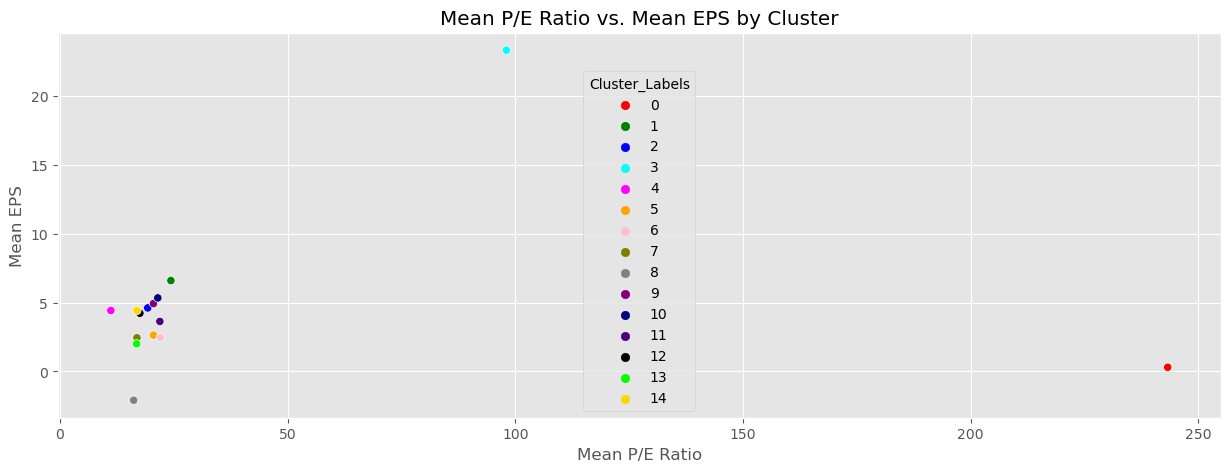

In [43]:
#Building a scatterplot that represents the average "Price/Earnings" and "Earnings/Share" values for each cluster. 


colors = {0: "red", 1: "green", 2: "blue", 3: "cyan", 4: "magenta", 5: "orange", 6: "pink", 7: "olive", 8: "gray", 9: "purple", 10: "navy", 
          11: "indigo", 12: "black", 13: "lime", 14: "gold"}


sns.scatterplot(data = cluster_means, x = "Price/Earnings", y = "Earnings/Share", hue = cluster_means.index, palette = colors, legend = "full")

plt.xlabel("Mean P/E Ratio")
plt.ylabel("Mean EPS")
plt.title("Mean P/E Ratio vs. Mean EPS by Cluster")

plt.show()


#### High Growth Cluster Analysis:
Here we can see that Cluster 3 (Cyan) appears to match our criteria. If we build a 2 dimensional scatterplot to just analyze the mean of two crucial features within the criteria for a Growth Stock, we can see that Cluster 3 does indeed appear to have a higher average P/E Ratio and EPS value than the market average P/E Ratios and EPS values. Furthermore, the average Revenue Growth and Net Income values for Cluster 4 are higher than the market average Revenue Growth and Net Income. This enables us to assert the fact that our pre-defined conditions strongly match the criteria for a "High Growth" stock, which makes sense because stocks that are of "High Growth" tend to have P/E Ratios, EPS values, Net Income values, and Revenue Growth percentages higher than the market average or their respective sectors' average. However, these stocks do not tend to pay dividends, as they continually reinvest their earnings to spur their continious growth.

In [44]:
#Determining which clusters contain "Dividend Paying" criteria based on conditions regarding the "Dividend Yield", and "Market Cap" features.

dividends_clusters = cluster_means[(cluster_means["Dividend Yield"] > fundamentals_df["Dividend Yield"].mean()) & 
                                                (cluster_means["Market Cap"] > fundamentals_df["Market Cap"].mean())]
dividends_clusters

Beta  Earnings/Share  Price/Earnings           Market Cap  \
Cluster_Labels                                                                  
2               1.260107        4.615882       19.287059  309998396614.764709   
4               0.597960        4.426667       11.190000  151014247968.333344   
11              0.614445        3.634545       21.951212   58590779281.181816   
12              1.090357        4.230000       17.565000        83721357322.5   

                Dividend Yield  Price/Sales   Price/Book          Net Income  \
Cluster_Labels                                                                 
2                     2.205407     3.870931     8.061176  16431561455.504236   
4                     7.567797     1.511056     3.716667  20958534006.169815   
11                    2.375964     2.873089    18.216970   2835254567.829942   
12                    4.607734     2.231783  1361.040000   4004306571.996038   

                Revenue Growth  
Cluster_Labels                  
2                    -0.016525  
4                     0.009500  
11                    0.014448  
12                    0.085000

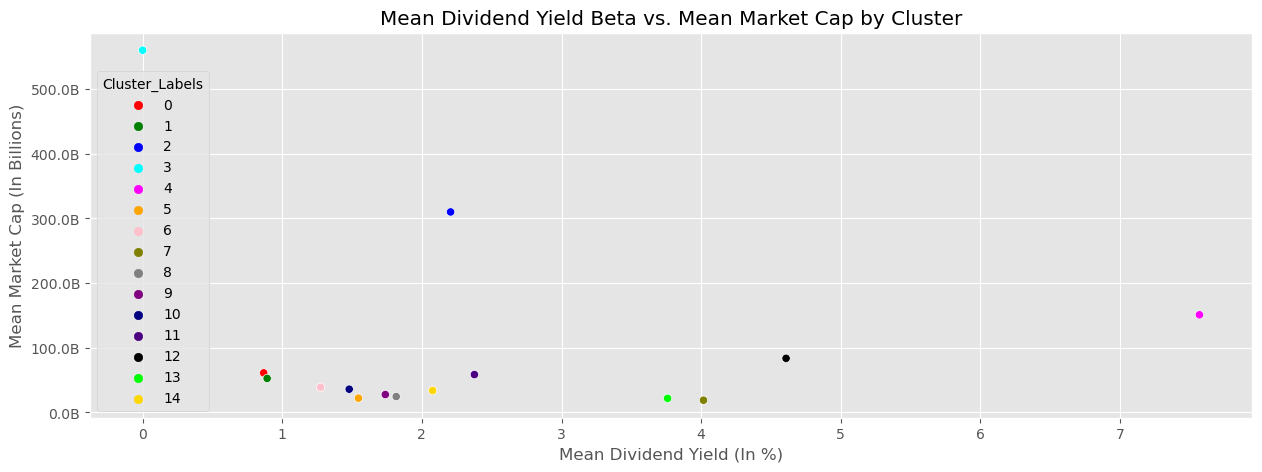

In [45]:
#Building a scatterplot that represents the average Dividend Yield in % and Market Cap values for each cluster 

sns.scatterplot(data = cluster_means, x = "Dividend Yield", y = "Market Cap", hue = cluster_means.index, palette = colors, legend = "full")

plt.gca().yaxis.set_major_formatter(formatterB)
plt.xlabel("Mean Dividend Yield (In %)")
plt.ylabel("Mean Market Cap (In Billions)")
plt.title("Mean Dividend Yield Beta vs. Mean Market Cap by Cluster")
plt.show()

#### Dividend Paying Cluter Analysis:
Here we can see that Cluster 4 (Pink) appears to have the highest average Dividend Yield amongst all 15 clusters. Clusters 2 (Dark Blue), 4 (Dark Pink), 11 (Dark Purple), 12 (Black) do appear to have higher average dividend yields than the market average alongside modestly high average Market Caps. Although each of these 4 Clusters may not have the highest average Market Cap between all the clusters, though, they still have a higher average Market Cap than the overall market average Market Cap. This also aligns well with our criteria for a "Dividend Paying" stock, as stocks that tend to pay higher dividend amounts to investors consistent of a higher dividend yield alongside a larger Market Cap than the market average. However, the Market Cap for "Dividend Paying" stocks do not tend to be nearly as high as compared to growth stocks, as we can see from our "High Growth" Cluster 3 (Cyan). Therefore, we can estimate that our pre-defined conditions required to meet the criteria of a "Dividend Paying" stock are significant. 

In [46]:
#Determining which clusters contain "Undervalued" criteria based on conditions regarding the "Price/Earnings", and "Price/Book" features.

undervalued_clusters = cluster_means[(cluster_means["Price/Earnings"] < fundamentals_df["Price/Earnings"].mean()) &
                                     (cluster_means["Price/Book"] < fundamentals_df["Price/Book"].mean())]
undervalued_clusters

Beta  Earnings/Share  Price/Earnings           Market Cap  \
Cluster_Labels                                                                  
1               0.977222        6.602667       24.375333   52641257221.583336   
2               1.260107        4.615882       19.287059  309998396614.764709   
4               0.597960        4.426667       11.190000  151014247968.333344   
5               1.351380        2.640779       20.533377   22150161880.870129   
6               1.268424        2.473390       22.069492   39028316609.677963   
7               1.046750        2.446563       16.916875       18929488945.25   
8               1.877082       -2.090370       16.198889   24613288784.962963   
9               1.292522        4.932000       20.542400   27692010366.040001   
10              1.267311        5.344030       21.494328   35993151836.328362   
13              0.570955        2.014643       16.846429   21844022802.535713   
14              1.375129        4.425000       16.913387   33850297667.145161   

                Dividend Yield  Price/Sales  Price/Book          Net Income  \
Cluster_Labels                                                                
1                     0.891617     4.412497   10.793333    2044062394.09079   
2                     2.205407     3.870931    8.061176  16431561455.504236   
4                     7.567797     1.511056    3.716667  20958534006.169815   
5                     1.545241     2.176412   10.151169     966853782.27557   
6                     1.274448     5.673229   10.989153   1099751291.035739   
7                     4.016469     9.799353    3.347500    607054228.714739   
8                     1.816029     3.653368    2.453333   -826416670.834389   
9                     1.737976     2.876093    4.788800   1252653918.178305   
10                    1.479392     2.573401    9.188060   1526158935.057899   
13                    3.759224     2.561081    2.106786    806902200.681542   
14                    2.077037     3.373280    7.234516   1489061954.471488   

                Revenue Growth  
Cluster_Labels                  
1                     0.044751  
2                    -0.016525  
4                     0.009500  
5                     0.062498  
6                     0.047421  
7                     0.088848  
8                    -0.117133  
9                    -0.046050  
10                    0.052288  
13                   -0.058444  
14                    0.040736

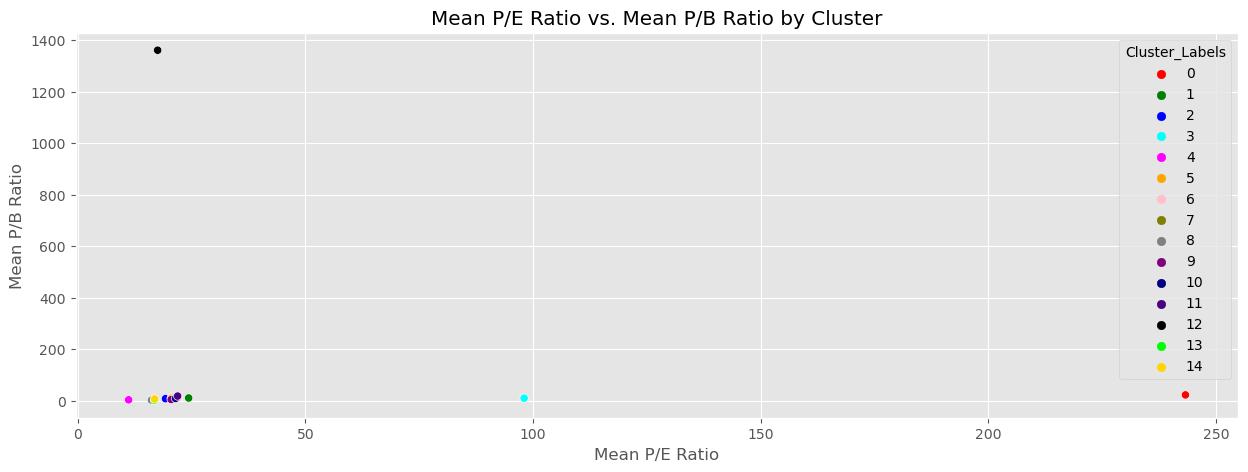

In [47]:
#Building a scatterplot that represents the average "Price/Earnings" and "Price/Book" values for each cluster 

sns.scatterplot(data = cluster_means, x = "Price/Earnings", y = "Price/Book", hue = cluster_means.index, palette = colors, legend = "full")

plt.title("Mean P/E Ratio vs. Mean P/B Ratio by Cluster")
plt.xlabel("Mean P/E Ratio")
plt.ylabel("Mean P/B Ratio")
plt.show()

#### Undervalued Cluster Analysis:
It appears that 11 out of our 15 total clusters appear to fit the pre-defined conditions we set to match the critiera for an "Undervalued" stock. In hindsight, this surprising insight may lead to the conclusion that most stocks are undervalued from an asset and price standpoint. However, this evaluation needs further investigation and analysis as these stocks may also have a slow or stagnant growth rate in overall returns (in %) and/or revenue over a long-time horizon, which signals that although the stock is undervalued relative to its price and assets, it could be due to the fact that the comapny does not any future long term growth prospects, indiciating that the stock may more of a "Dividend Paying" stock, as it derives it value from soley distributiing dividends to investors. 

In [48]:
#Determining which clusters contain "Volatile" criteria based on conditions regarding the "Beta" feature.

volatile_clusters = cluster_means[cluster_means["Beta"] > fundamentals_df["Beta"].mean()]
volatile_clusters

Beta  Earnings/Share  Price/Earnings           Market Cap  \
Cluster_Labels                                                                  
0               1.454421        0.304444      243.268889   61189759632.777779   
2               1.260107        4.615882       19.287059  309998396614.764709   
3               1.254424       23.340000       98.047500      560012586967.75   
5               1.351380        2.640779       20.533377   22150161880.870129   
6               1.268424        2.473390       22.069492   39028316609.677963   
8               1.877082       -2.090370       16.198889   24613288784.962963   
9               1.292522        4.932000       20.542400   27692010366.040001   
10              1.267311        5.344030       21.494328   35993151836.328362   
14              1.375129        4.425000       16.913387   33850297667.145161   

                Dividend Yield  Price/Sales  Price/Book          Net Income  \
Cluster_Labels                                                                
0                     0.866994     9.980055   22.735556     70889045.662243   
2                     2.205407     3.870931    8.061176  16431561455.504236   
3                     0.000000     6.669491   10.142500   9428579033.492857   
5                     1.545241     2.176412   10.151169     966853782.27557   
6                     1.274448     5.673229   10.989153   1099751291.035739   
8                     1.816029     3.653368    2.453333   -826416670.834389   
9                     1.737976     2.876093    4.788800   1252653918.178305   
10                    1.479392     2.573401    9.188060   1526158935.057899   
14                    2.077037     3.373280    7.234516   1489061954.471488   

                Revenue Growth  
Cluster_Labels                  
0                     0.309041  
2                    -0.016525  
3                     0.117250  
5                     0.062498  
6                     0.047421  
8                    -0.117133  
9                    -0.046050  
10                    0.052288  
14                    0.040736

#### Volatile Cluster Analysis:
There appears to 9 out of 15 total Clusters with average Beta values higher than the market average Beta. Similar to our Unvervalued Cluster Analysis, the conclusion that most stocks are volatile needs to be critically examined even further. Although most stocks can indeed be more volatile than the market average, it's vital to understand that certain stocks that are more volatile than the market average also contain conditions that are of "High Growth" or "Undervalued". This is because there is a revoling uncertainty around stability of "Undervalued" stocks or future growth prospects of "High Growht" stocks, which can lead to investors making indecieve short term decisions, hence leading to higher volatility. Only if a given stock is more volatile than the market and does not meet the critiera for "High Growth" or "Undervalued" can it be considered as plainly "Volatile".  

In [49]:
#Determining which clusters contain "Low Growth" criteria based on conditions regarding the "Revenue Growth" feature.

low_growth_clusters = cluster_means[cluster_means["Revenue Growth"] < fundamentals_df["Revenue Growth"].mean()]
low_growth_clusters

Beta  Earnings/Share  Price/Earnings           Market Cap  \
Cluster_Labels                                                                  
2               1.260107        4.615882       19.287059  309998396614.764709   
4               0.597960        4.426667       11.190000  151014247968.333344   
8               1.877082       -2.090370       16.198889   24613288784.962963   
9               1.292522        4.932000       20.542400   27692010366.040001   
11              0.614445        3.634545       21.951212   58590779281.181816   
13              0.570955        2.014643       16.846429   21844022802.535713   

                Dividend Yield  Price/Sales  Price/Book          Net Income  \
Cluster_Labels                                                                
2                     2.205407     3.870931    8.061176  16431561455.504236   
4                     7.567797     1.511056    3.716667  20958534006.169815   
8                     1.816029     3.653368    2.453333   -826416670.834389   
9                     1.737976     2.876093    4.788800   1252653918.178305   
11                    2.375964     2.873089   18.216970   2835254567.829942   
13                    3.759224     2.561081    2.106786    806902200.681542   

                Revenue Growth  
Cluster_Labels                  
2                    -0.016525  
4                     0.009500  
8                    -0.117133  
9                    -0.046050  
11                    0.014448  
13                   -0.058444

#### Low Growth Analysis:

While there appears to be 6 out of 15 clusters that have a lower average Revenue Growth rate below the market average, this does not immieidately signfiy that they are of "Low Growth". It could very well be that these stocks are experiencing the temporary pitfall of current broader economic conditions or are currently in the midst of developing their business model to generate more cash flow. In order to sucantly determine if a stock is of low growth, this condition (Revenue Growth below average market Revenue Growth) must be paired with another crucial factor which is the return rate of the stock over a specific time period. For a given stock, if the return rate over a specific time period alongside its revenue growth rate are lower than the market or their corresponding sectors' average, it could imply that it is of "Low Growth".

### Clustering Analysis and Feature Engineering criteria for target feature "Stock Insight":

Our clustering analysis has shown that particular conditions related to specific feature values tend to group observations into one or more clusters. This finding supports our hypothesis that setting certain pre-defined conditions for feature values can cause stocks to be grouped similarly, indicating that these feature values capture unique characteristics, which could establish the criteria for our target feature categories for a given stock.

With the insights gleaned from our Clustering Analysis alongside our domain knowledge, we now will feature engineer our target feature called "Stock Insight" which will again have five labels: High Growth, Dividend Paying, Undervalued, Volatile, and Low Growth. We will be using both of our datasets: fundamentals_df with the fundamentals for each stock and final_time_df, with the time series for each stock. Here are the conditions:

- If an observation (stock in fundamentals_df) has a higher Price/Earnings (fundamentals_df) AND Earnings/Share (fundamentals_df) AND Revenue Growth (fundamentals_df) AND Net Income (fundamentals_df) than its corresponding sector mean (fundamentals_df) OR return rate over a 3 year period (pct_change from final_time_df) AND beta greater than 1.2 (fundamentals_df): High Growth

- If an observation (stock in fundamentals_df) has a dividend yield (fundamentals_df) greater than the mean dividend yield (fundamentals_df) of all observations (all stocks in fundamentals_df) AND has a market cap (fundamenals_df) greater than its corresponding sector mean (fundamentals_df): Dividend Paying

- If an observation (stock in fundamentals_df) has a lower Price/Earnings (fundamentals_df) than its corresponding sector mean AND a higher 5 year return rate (pct_change from final_time_df) AND lower Price/Book (fundamentals_df) than its corresponding sector mean: Undervalued

- If an observation (stock in fundamentals_df) has a higher Beta (fundamentals_df) than the mean Beta (fundamentals_df) of all observations (all stocks in fundamentals_df): Volatile

- If an observation (stock in fundamentals_df) has a lower return rate over all periods (pct_change from final_time_df for all time periods in dataset for all stocks) than the mean return rate over all periods (pct_change from final_time_df for all time periods in dataset for all stocks) AND has a lower Revenue Growth (fundamentals_df) than its corresponding sector mean (fundamentals_df): Low Growth

- If an observation (stock in fundamentals_df) has a higher Price/Earnings (fundamentals_df) OR Price/Book (fundamentals_df) AND Price/Sales than its corresponding sector mean (fundamentals_df): Overvalued

- If an observation does not meat any of the defined criteria: Stable

In [50]:
#Calculating the necessary means and return rates. We will calculate the Price/Earnings, Earnings/Share, Revenue Growth, Net Income, and Market Cap
#feature means BY SECTOR. This is because when we compare every observation (stock) based on these features, its best to compare them by sector 
#instead of the entire market average. However, when we compare every observation based on Beta and Dividend Yield, its best to compare them by
#the market average, so that is what we will do for only these two features. We will also compute the 3 and 5 year return rate alongside the 
#average return rate across all periods for growth comparisons 

sector_means = fundamentals_df.groupby("Sector")[["Price/Earnings", "Earnings/Share", "Revenue Growth", 
                                                  "Net Income", "Market Cap", "Price/Book", "Price/Sales"]].mean()
beta_mean = fundamentals_df["Beta"].mean()
div_yield_mean = fundamentals_df["Dividend Yield"].mean()

return_rate_3_yr = final_time_df.pct_change(periods = 36).iloc[-1]
return_rate_5_yr = final_time_df.pct_change(periods = 60).iloc[-1]
return_rate_all_periods = final_time_df.pct_change().iloc[-1]
mean_return_rate_all_periods = final_time_df.pct_change().mean().mean()


In [51]:
#Creating a mapping from the "Symbol" feature to the "Sector" feature in our fundamentals dataframe that will be used to calculate the 3 year
#return rate for each sector from our time series dataset. Also calculating the average 3-year return rate for each sector

symbol_to_sector = dict(zip(fundamentals_df.index, fundamentals_df["Sector"]))

sector_return_rate_3_yr = pd.Series({sector: return_rate_3_yr[[symbol for symbol in fundamentals_df[fundamentals_df["Sector"] == sector].index 
                                                               if symbol in return_rate_3_yr.index]].mean() 
                                                               for sector in fundamentals_df["Sector"].unique()})


sector_return_rate_5_yr = pd.Series({sector: return_rate_5_yr[[symbol for symbol in fundamentals_df[fundamentals_df["Sector"] == sector].index
                                                               if symbol in return_rate_5_yr.index]].mean()
                                                               for sector in fundamentals_df["Sector"].unique()})
                                                              

In [52]:
#Defining our "High Growth" criteria function

def check_high_growth(index, row, sector_means, return_rate_3_yr, sector_return_rate_3_yr):
    sector = symbol_to_sector.get(index)

    return (
        row["Price/Earnings"] > sector_means.loc[row["Sector"], "Price/Earnings"] and
        row["Earnings/Share"] > sector_means.loc[row["Sector"], "Earnings/Share"] and
        row["Net Income"] > sector_means.loc[row["Sector"], "Net Income"] and 
        row["Revenue Growth"] > sector_means.loc[row["Sector"], "Revenue Growth"] or
        return_rate_3_yr.get(index, 0) > sector_return_rate_3_yr.get(sector, 0) and
        row["Beta"] > 1.2
    )

In [53]:
#Defining our "Dividend Paying" criteria function

def check_dividend_paying(row, div_yield_mean, sector_means):

    return (
        row["Dividend Yield"] > div_yield_mean and
        row["Market Cap"] > sector_means.loc[row["Sector"], "Market Cap"]
    )

In [54]:
#Defining our "Undervalued" criteira function

def check_undervalued(index, row, sector_means, return_rate_5_yr, sector_return_rate_5_yr):
    sector = symbol_to_sector.get(index)

    return (
        row["Price/Earnings"] < sector_means.loc[row["Sector"], "Price/Earnings"] and
        return_rate_5_yr.get(index, 0) > sector_return_rate_5_yr.get(sector) and
        row["Price/Book"] < sector_means.loc[row["Sector"], "Price/Book"]
    )

In [55]:
#Defining our "Volatile" criteria function

def check_volatile(row, beta_mean):

    return (
        row["Beta"] > beta_mean
    )

In [56]:
#Defining our "Low Growth" criteria function

def check_low_growth(index, row, return_rate_all_periods, mean_return_rate_all_periods, sector_means):

    return (
        return_rate_all_periods.get(index, 0) < mean_return_rate_all_periods and
        row["Revenue Growth"] < sector_means.loc[row["Sector"], "Revenue Growth"]
    )

In [57]:
#Defining our "Overvalued" criteria function

def check_overvalued(row, sector_means):
    return (
        row["Price/Earnings"] > sector_means.loc[row["Sector"], "Price/Earnings"] or
        row["Price/Book"] > sector_means.loc[row["Sector"], "Price/Book"] and
        row["Price/Sales"] > sector_means.loc[row["Sector"], "Price/Sales"]
    )

In [58]:
#Applying the conditions to each observation (stock) and assigning them their respective categories/labels then creating the new column
#"Stock Insight"

labels = []

for index, row in fundamentals_df.iterrows():
    
   if check_high_growth(index, row, sector_means, return_rate_3_yr, sector_return_rate_3_yr):
      labels.append("High Growth")
   elif check_dividend_paying(row, div_yield_mean, sector_means):
      labels.append("Dividend Paying")
   elif check_undervalued(index, row, sector_means, return_rate_5_yr, sector_return_rate_5_yr):
      labels.append("Undervalued")
   elif check_low_growth(index, row, return_rate_all_periods, mean_return_rate_all_periods, sector_means):
      labels.append("Low Growth")
   elif check_volatile(row, beta_mean):
      labels.append("Volatile")
   elif check_overvalued(row, sector_means):
      labels.append("Overvalued")
   else:
      labels.append("Stable")

fundamentals_df["Stock Insight"] = labels
fundamentals_df

Name                  Sector   Price  \
Symbol                                                             
A       Agilent Technologies Inc             Health Care   65.05   
AAL      American Airlines Group             Industrials   48.60   
AAP           Advance Auto Parts  Consumer Discretionary  109.63   
AAPL                  Apple Inc.  Information Technology  155.15   
ABBV                 AbbVie Inc.             Health Care  108.48   
...                          ...                     ...     ...   
XYL                   Xylem Inc.             Industrials   70.24   
YUM              Yum! Brands Inc  Consumer Discretionary   76.30   
ZBH       Zimmer Biomet Holdings             Health Care  115.53   
ZION               Zions Bancorp              Financials   50.71   
ZTS                       Zoetis             Health Care   71.51   

        Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
Symbol                                                                
A                27.45        0.875698            2.10        75.00   
AAL               9.92        0.778210            3.91        59.08   
AAP              19.54        0.218321            6.19       169.55   
AAPL             16.86        1.579541            9.20       180.10   
ABBV             19.41        2.499560            3.29       125.86   
...                ...             ...             ...          ...   
XYL              30.94        1.170079            1.83        76.81   
YUM              27.25        1.797080            4.07        86.93   
ZBH              14.32        0.794834            9.01       133.49   
ZION             17.73        1.480933            2.60        55.61   
ZTS              32.80        0.682372            1.65        80.13   

        52 Week High      Market Cap       EBITDA  Price/Sales  Price/Book  \
Symbol                                                                       
A              49.23   21984606918.0   1094000000     6.493563        4.56   
AAL            39.21   24594852352.0   5761000000     0.580226        6.03   
AAP            78.81    8123611867.0    853941000     1.130106        2.51   
AAPL          131.12  809508034020.0  79386000000     3.458609        5.66   
ABBV           60.05  181386347059.0  10310000000     6.291571       26.14   
...              ...             ...          ...          ...         ...   
XYL            46.86   12915021000.0    722000000     2.726209        5.31   
YUM            62.85   27003303098.0   2289000000     6.313636      212.08   
ZBH           108.17   24454698119.0   2007400000     3.164895        2.39   
ZION           38.43   10670678640.0            0     3.794579        1.42   
ZTS            52.00   35991109776.0   1734000000     9.280896       18.09   

                Net Income      Beta  Revenue Growth  Cluster_Labels  \
Symbol                                                                 
A         709725972.756341  1.394107          -0.087               1   
AAL      1978721660.418107  1.559137          -0.010              10   
AAP       458680629.907233  1.146430           0.060               5   
AAPL    48001765472.020615  1.234436           0.021               2   
ABBV     5501116167.257651  0.806787          -0.054               1   
...                    ...       ...             ...             ...   
XYL        336481896.78246  1.078067           0.406              10   
YUM        1440412104.9654  0.981713           0.008               5   
ZBH      1907182810.111573  1.331521           0.063               1   
ZION      547106378.702426  1.674871          -0.119              14   
ZTS       830447925.190882  0.601090           0.085               1   

          Stock Insight  
Symbol                   
A           High Growth  
AAL          Low Growth  
AAP         Undervalued  
AAPL        High Growth  
ABBV    Dividend Paying  
...                 ...  
XYL          Overvalued  
YUM          Low Growth  
ZBH    

In [59]:
#Checking to see the number of values in each of our target feature categories. 

print(fundamentals_df["Stock Insight"].value_counts())

Low Growth         179
High Growth         84
Dividend Paying     69
Volatile            51
Overvalued          51
Stable              37
Undervalued         34
Name: Stock Insight, dtype: int64


### Supervised Learning (Classification):

We will implement classification models to evaluate whether or not utilizing supervised learning methodologies can correctly identify the complex patterns, relationships, and interconnections within the data (features) and properley decipher the category (target feature) a stock belongs too. There may also be some naunces in the data that our criteria has failed to capture that supervised learning methodolgies can identify and model to provide additional invaluable insights into determining the true category a stock may fall in. We will utilize 4 different classification models that we think are best suited for our problem which consist of Support Vector Machines, Decision Trees, Random Forests, and K Nearest Neighbors. We will split our fundamentals dataset into a traing and testing portion to evaluate how well each of these models can perform on unseen data once their training phase is complete. After evaluation, we will discuss the insights gleaned from each model and when each model should or should not utilized in reference to determing the applicable approach that can be utilized to categorize stocks into insightful categories to best assist investors in assembling a portfolio that maximizes returns, minimizes risk, and aligns with their long-term investment objectives. 

In [60]:
#One hot encoding our Fundamentals dataset for training and testing then splitting it into a training and testing split, utilizing 70% of the data
#for training and 30% for testing. Also dropping the columns not needed in the modeling phase 
from sklearn.model_selection import train_test_split 

fundamentals_df.drop(columns = ["Name", "Cluster_Labels"], inplace = True)

final_df = pd.get_dummies(fundamentals_df, columns = ["Sector"], drop_first = True, prefix = ["dummy_Sector"])

final_train, final_test = train_test_split(final_df, train_size = 0.7, random_state = 5)
print(final_train.shape)
print(final_test.shape)

(353, 24)
(152, 24)


In [61]:
#Splitting both subsets into x (predictor variables) and y (target variable) sets

x_train = final_train.drop(columns = ["Stock Insight"])
y_train = final_train["Stock Insight"]

x_test = final_test.drop(columns = ["Stock Insight"])
y_test = final_test["Stock Insight"]

In [63]:
#Dependencies needed for Supervised Learning and evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [64]:
#Defining a function to plot a confusion matrix
def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    fig = plt.figure(figsize = (6, 6))
    plt.matshow(conf_mat, cmap = plt.cm.Blues, fignum = 1)
    plt.yticks(range(4), range(4))
    plt.xticks(range(4), range(4))
    plt.colorbar()
    for i in range(4):
        for j in range(4):
            plt.text(i - 0.2, j + 0.1, str(conf_mat[j, i]), color = "tab:red")

In [65]:
#Setting the number of k folds to perform during cross-validation and storing it in a variable

crossvalidation = KFold(n_splits = 10, random_state = True, shuffle = True)

In [66]:
#Splitting the Scaled Fundamentals dataset for our SVC and KNN models
final_train_scaled, final_test_scaled = train_test_split(scaled_fundamentals_df, train_size = 0.7, random_state = 5)

x_train_scaled = final_train_scaled
x_test_scaled = final_test_scaled

In [68]:
#Model parameter hyptertuning by utilizing GridSearchCV for for our Support Vector Classification model. We will determine the best parameters
#to maximize model performance based the training dataset. We will tune four paramters: "C", "kernel", "degree", and "gamma". 
#We will then show the best test accuracy, best cross validation mean accuracy, and the model accuracy utilizing the optimal parameters

params = {"C": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
          "kernel": ["poly", "rbf"],
          "degree": [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 18],
          "gamma": ["scale", "auto"]}

svm_model = GridSearchCV(SVC(), param_grid = params, cv = crossvalidation, n_jobs = -1, verbose = 5)
svm_model.fit(x_train_scaled, y_train)

print("Training Accuracy:", svm_model.best_estimator_.score(x_train, y_train))
print("Best Accuracy through Grid Search:", svm_model.best_score_)
print("Best Hyperparameters:", svm_model.best_params_)

Fitting 10 folds for each of 616 candidates, totalling 6160 fits
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require 

In [69]:
#Will now train a new SVM model with best possible parameters on the training dataset and evaluate on testing dataset and compare it with its 
#cross validated results. Because the kernel kept on crashing, we will use the best hyperparameters found in the best cross validated fold.

svm_model_X = SVC(C = 9, degree = 18, gamma = "scale", kernel = "rbf").fit(x_train_scaled, y_train)
svm_model_cv_scores = cross_val_score(svm_model_X, x_train_scaled, y_train, cv = crossvalidation)


print(f"Testing Accuracy utilzing best hyperparameters: {svm_model_X.score(x_test_scaled, y_test) * 100}% accurate")
print(f"Averge cross validation score on 10 K folds: {svm_model_cv_scores.mean() * 100}% accurate")

Testing Accuracy utilzing best hyperparameters: 47.368421052631575% accurate
Averge cross validation score on 10 K folds: 52.71428571428572% accurate


In [70]:
#Evaluating our SVM model performance based on accuracy, precision, recall, and f1 score. 

prediction_svm = svm_model_X.predict(x_test_scaled)

print("Classification Report")
print(classification_report(y_test, prediction_svm))
print("=" * 50)
print("Accuracy Score:", accuracy_score(prediction_svm, y_test))
print("=" * 50)

Classification Report
                 precision    recall  f1-score   support

Dividend Paying       0.59      0.67      0.62        15
    High Growth       0.38      0.21      0.27        28
     Low Growth       0.50      0.74      0.60        50
     Overvalued       0.69      0.41      0.51        22
         Stable       0.33      0.30      0.32        10
    Undervalued       0.00      0.00      0.00        10
       Volatile       0.47      0.41      0.44        17

       accuracy                           0.47       152
      macro avg       0.42      0.39      0.39       152
   weighted avg       0.47      0.47      0.45       152

Accuracy Score: 0.47368421052631576


In [71]:
#Model parameter hyptertuning by utilizing GridSearchCV for for our Gradient Boosting model. We will determine the best parameters
#to maximize model performance based the training dataset. We will tune four paramters: "loss", "learning_rate", "n_estimators", "criterion", and
#"min_samples_split". 
#We will then show the best test accuracy, best cross validation mean accuracy, and the model accuracy utilizing the optimal parameters

params = {"loss":["log_loss", "exponential"], 
          "learning_rate":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 3, 5, 7],
          "n_estimators":[100, 200, 300],
          "criterion":["friedmen_mse", "squared_error"],
          "min_samples_split":[2, 4, 6, 8, 10, 30, 50, 70, 100]}

GBoost_model = GridSearchCV(GradientBoostingClassifier(), cv = crossvalidation, param_grid = params, n_jobs = -1, verbose = 5)
GBoost_model.fit(x_train, y_train)

print(f"Training Accuracy: {GBoost_model.best_estimator_.score(x_train, y_train)}% accurate")
print(f"Best Accuracy through GridSearch: {GBoost_model.best_score_}% accurate")
print(f"Best hyper parameters: {GBoost_model.best_params_}")

Fitting 10 folds for each of 1404 candidates, totalling 14040 fits
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will requir

In [72]:
#Will now train a new Gradient Boosting model with best possible parameters on the training dataset and evaluate on testing dataset and compare it with its 
#cross validated results. Because the kernel kept on crashing, we will use the best hyperparameters found in the best cross validated fold.

GBoost_model_X = GradientBoostingClassifier(criterion = "squared_error", learning_rate = 0.2, loss = "log_loss", 
                                            min_samples_split = 4, n_estimators = 100).fit(x_train, y_train)
GBoost_model_X_cv_scores = cross_val_score(GBoost_model_X, x_train, y_train, cv = crossvalidation)

print(f"Testing Accuracy utilizing the best hyperparameters is {GBoost_model_X.score(x_test, y_test)}% accurate")
print(f"Average Cross Validated Score across 10 K Folds is {GBoost_model_X_cv_scores.mean()}% accurate")


Testing Accuracy utilizing the best hyperparameters is 0.6381578947368421% accurate
Average Cross Validated Score across 10 K Folds is 0.5950793650793651% accurate


Classification Report
                 precision    recall  f1-score   support

Dividend Paying       0.61      0.93      0.74        15
    High Growth       0.57      0.14      0.23        28
     Low Growth       0.65      0.92      0.76        50
     Overvalued       1.00      0.73      0.84        22
         Stable       0.67      0.40      0.50        10
    Undervalued       0.20      0.20      0.20        10
       Volatile       0.58      0.65      0.61        17

       accuracy                           0.64       152
      macro avg       0.61      0.57      0.55       152
   weighted avg       0.64      0.64      0.60       152

Model Accuracy: 0.6381578947368421% accurate
Log Loss from Prediction Probability: 1.7015958552210129


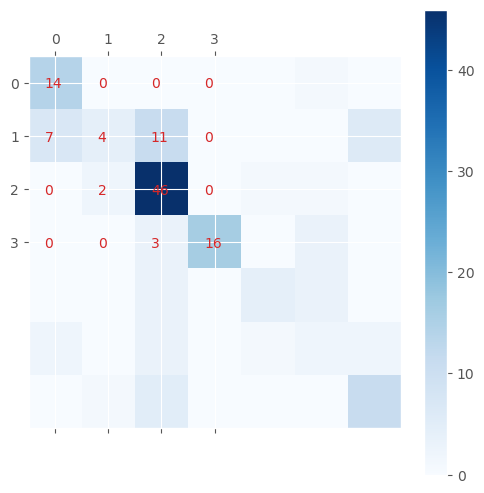

In [74]:
#Evaluating our Gradient Boosting model performance based on accuracy, precision, recall, and f1 score. 

prediction_GBoost = GBoost_model_X.predict(x_test)

print("Classification Report")
print(classification_report(y_test, prediction_GBoost))
print("=" * 50)
print(f"Model Accuracy: {accuracy_score(prediction_GBoost, y_test)}% accurate")

predict_proba_GBoost = GBoost_model_X.predict_proba(x_test)
print("=" * 50)
log_loss_GBoost = log_loss(y_test, predict_proba_GBoost)
print("Log Loss from Prediction Probability:", log_loss_GBoost)
print("=" * 50)

plot_confusion_matrix(y_test, prediction_GBoost)

In [75]:
#Model parameter hyptertuning for for our Random Forest model. We will determine the best parameters
#to maximize model performance based on our training data We will tune one paramter: n_estimators. We will then show the best test accuracy, 
#best cross validation  mean accuracy, and the model accuracy utilizing the optimal parameters


params = {"n_estimators": [5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

rf_model = GridSearchCV(RandomForestClassifier(), param_grid = params, cv = crossvalidation, n_jobs = -1, verbose = 5)
rf_model.fit(x_train, y_train)

print(f"Training Accuracy Utilizng best hyperparameters: {rf_model.best_estimator_.score(x_train, y_train)}% accurate")
print(f"Best Accuracy through GridSearch utilizing the training data: {rf_model.best_score_}% accurate")
print(f"Best Hyperparameters: {rf_model.best_params_}")

Fitting 10 folds for each of 12 candidates, totalling 120 fits


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [76]:
#Will now train a new Random Forest model with best possible parameters on the training dataset and evaluate on testing dataset and compare it
#with its the cross validated results

rf_model_X = RandomForestClassifier(n_estimators = 50).fit(x_train, y_train)
rf_model_cv_scores = cross_val_score(rf_model_X, x_train, y_train, cv = crossvalidation)

print(f"Testing Accuracy utilizing best hyperparameters: {rf_model_X.score(x_test, y_test)}% accurate")
print(f"Average corss validated score on 10 K folds : {rf_model_cv_scores.mean()}% accurate")

Testing Accuracy utilizing best hyperparameters: 0.5723684210526315% accurate
Average corss validated score on 10 K folds : 0.578095238095238% accurate


Classification Report
                 precision    recall  f1-score   support

Dividend Paying       0.53      0.60      0.56        15
    High Growth       0.62      0.18      0.28        28
     Low Growth       0.56      0.90      0.69        50
     Overvalued       0.88      0.64      0.74        22
         Stable       0.44      0.40      0.42        10
    Undervalued       0.00      0.00      0.00        10
       Volatile       0.48      0.59      0.53        17

       accuracy                           0.57       152
      macro avg       0.50      0.47      0.46       152
   weighted avg       0.56      0.57      0.53       152

Confusion Matrix
[[ 9  0  4  0  0  0  2]
 [ 5  5 11  0  1  0  6]
 [ 1  1 45  2  1  0  0]
 [ 0  0  6 14  1  0  1]
 [ 0  0  5  0  4  1  0]
 [ 2  0  4  0  2  0  2]
 [ 0  2  5  0  0  0 10]]
Model Accuracy: 57.23684210526315% accurate
Log Loss from Prediction Probability: 1.6427688711376442


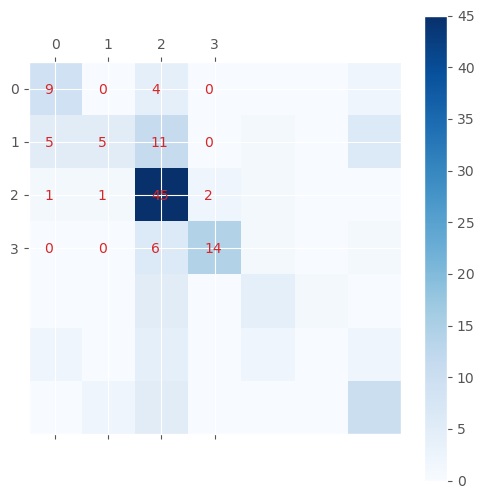

In [77]:
#Evaluating our Random Forest model performance based on accuracy, precision, recall, log_loss and f1 score. Also building a confusion matrix
#to better visualize results

prediction_rf = rf_model_X.predict(x_test)

print("Classification Report")
print(classification_report(y_test, prediction_rf))
print("=" * 50)
print("Confusion Matrix")
print(confusion_matrix(y_test, prediction_rf))
print("=" * 50)
print(f"Model Accuracy: {accuracy_score(prediction_rf, y_test) * 100}% accurate")
print("=" * 50)

predict_prob_rf = rf_model_X.predict_proba(x_test)
log_loss_rf = log_loss(y_test, predict_prob_rf)
print("Log Loss from Prediction Probability:", log_loss_rf)
print("=" * 50)

plot_confusion_matrix(y_test, prediction_rf)

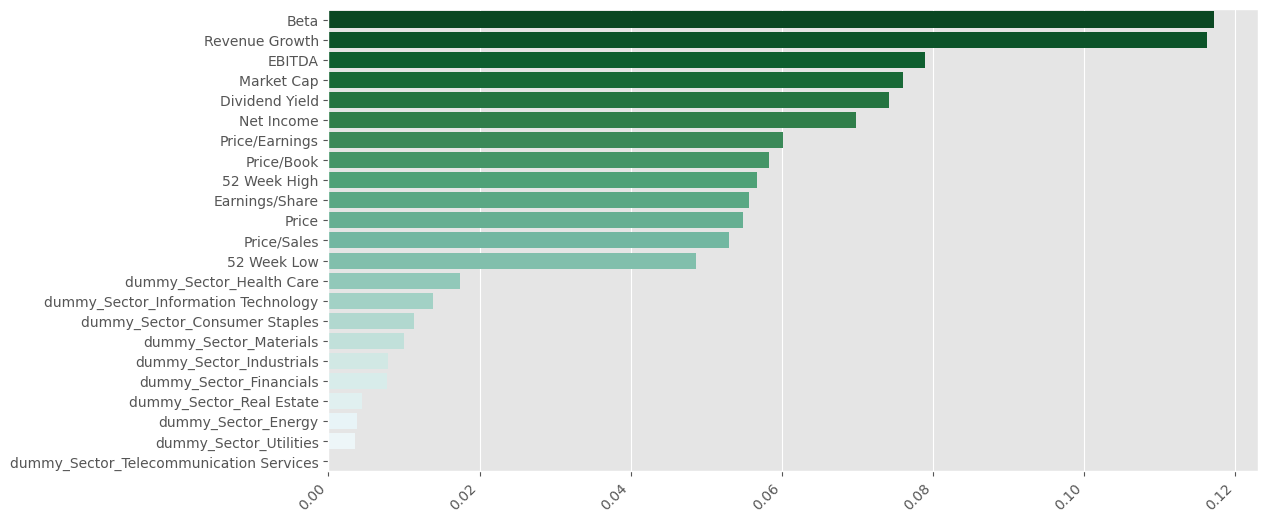

In [78]:
#Building a visualization to get an idea of the features being used to make decision in our Decision Tree Classifier

fi = rf_model_X.feature_importances_ 
fi = pd.Series(data = fi, index = x_train.columns) 
fi.sort_values(ascending = False, inplace = True) 

plt.figure(figsize = (12, 6))
chart = sns.barplot(x = fi, y = fi.index, palette = sns.color_palette("BuGn_r", n_colors = len(fi)))
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")
plt.show()

In [79]:
#Model parameter hyptertuning for for our Decision Tree Classifier. We will determine the best parameters
#to maximize model performance based on our training dataset. We will tune three paramters: max_leaf_nodes, max_depth, and min_samples_split. 
#We will then show the best test accuracy, best cross validation mean accuracy, and the model accuracy utilizing the optimal parameters

params = {"max_leaf_nodes": [2, 4, 8, 16, 32, 64, 100, 200],
          "max_depth": [10, 15, 20, 30, 40, 50, 60, 80, 100],
          "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
          "criterion": ["gini", "entropy"]}

dt_model = GridSearchCV(DecisionTreeClassifier(), param_grid = params, cv = crossvalidation, n_jobs = -1, verbose = 5)
dt_model.fit(x_train, y_train)

print(f"Training Accuracy Utilizing best hyperparameter is: {dt_model.best_estimator_.score(x_train, y_train)}% accurate")
print(f"Best Accuracy through GridSearch utilizing the training data is: {dt_model.best_score_}% accurate")
print("The best model hyperparameters are:", dt_model.best_params_)

Fitting 10 folds for each of 1296 candidates, totalling 12960 fits
[CV 1/10] END criterion=gini, max_depth=10, max_leaf_nodes=2, min_samples_split=2;, score=0.472 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=10, max_leaf_nodes=2, min_samples_split=2;, score=0.333 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=10, max_leaf_nodes=2, min_samples_split=2;, score=0.389 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=10, max_leaf_nodes=2, min_samples_split=2;, score=0.457 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=10, max_leaf_nodes=2, min_samples_split=2;, score=0.371 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=10, max_leaf_nodes=2, min_samples_split=3;, score=0.472 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=10, max_leaf_nodes=2, min_samples_split=2;, score=0.371 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=10, max_leaf_nodes=2, min_samples_split=2;, score=0.486 total time=   0.0s
[CV 7/10] END

In [80]:
#Will now train a new Decision Tree Classifier with best possible parameters on the training dataset and evaluate on testing dataset and compare 
#it with its the cross validated results

dt_model_X = DecisionTreeClassifier(criterion = "gini", max_depth = 30, max_leaf_nodes = 200, min_samples_split = 2).fit(x_train, y_train)
dt_model_cv_scores = cross_val_score(dt_model_X, x_train, y_train, cv = crossvalidation)

print(f"Testing Accuracy utilizing the best hyperparameters is: {dt_model_X.score(x_test, y_test)}% accurate")
print(f"Average cross validated score across 10 K folds is: {dt_model_cv_scores.mean()}% accurate")

Testing Accuracy utilizing the best hyperparameters is: 0.5328947368421053% accurate
Average cross validated score across 10 K folds is: 0.4931746031746032% accurate


Classification Report
                 precision    recall  f1-score   support

Dividend Paying       0.50      0.60      0.55        15
    High Growth       0.33      0.29      0.31        28
     Low Growth       0.62      0.68      0.65        50
     Overvalued       0.68      0.59      0.63        22
         Stable       0.56      0.50      0.53        10
    Undervalued       0.25      0.20      0.22        10
       Volatile       0.53      0.59      0.56        17

       accuracy                           0.53       152
      macro avg       0.50      0.49      0.49       152
   weighted avg       0.52      0.53      0.53       152

Confusion Matrix
[[ 9  1  1  0  1  2  1]
 [ 3  8  9  0  0  2  6]
 [ 0 11 34  4  1  0  0]
 [ 2  0  5 13  2  0  0]
 [ 2  0  1  0  5  2  0]
 [ 2  1  2  1  0  2  2]
 [ 0  3  3  1  0  0 10]]
Accuracy: 53.289473684210535% accurate
Log Loss from prediction probability 16.836180201495516


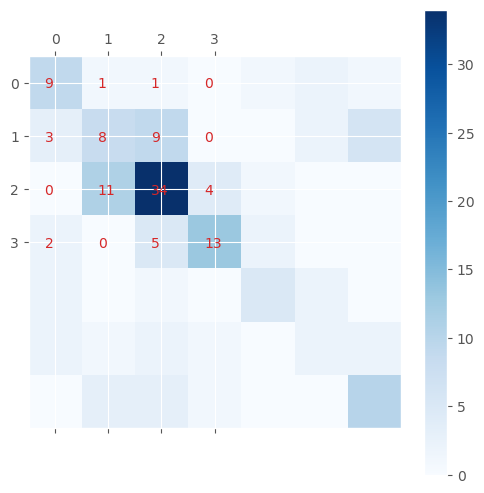

In [81]:
#Evaluating our Decision Tree Classifier performance based on accuracy, precision, recall, log_loss and f1 score. Also building a confusion matrix
#to better visualize results

prediction_dt = dt_model_X.predict(x_test)

print("Classification Report")
print(classification_report(y_test, prediction_dt))
print("=" * 50)
print("Confusion Matrix")
print(confusion_matrix(y_test, prediction_dt))
print("=" * 50)
print(f"Accuracy: {accuracy_score(prediction_dt, y_test) * 100}% accurate")

predict_prob_dt = dt_model_X.predict_proba(x_test)
log_loss_dt = log_loss(y_test, predict_prob_dt)
print("Log Loss from prediction probability", log_loss_dt)
print("=" * 50)
plot_confusion_matrix(y_test, prediction_dt)


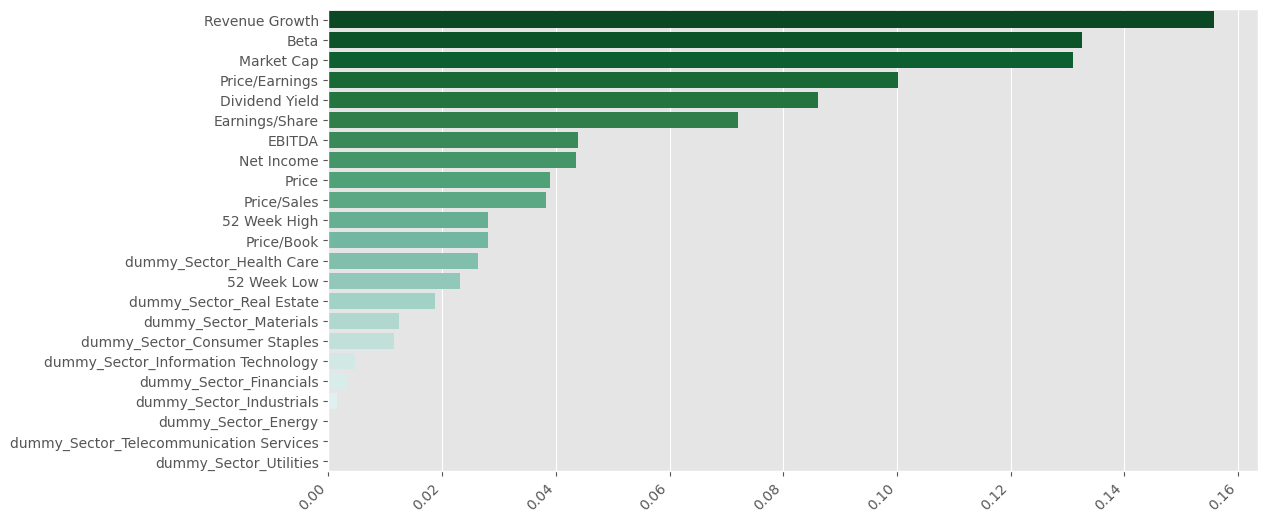

In [82]:
#Building a visualization to get an idea of the features being used to make decision in our Decision Tree Classifier

fi = dt_model_X.feature_importances_ 
fi = pd.Series(data = fi, index = x_train.columns) 
fi.sort_values(ascending = False, inplace = True) 

plt.figure(figsize = (12, 6))
chart = sns.barplot(x = fi, y = fi.index, palette = sns.color_palette("BuGn_r", n_colors = len(fi)))
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")
plt.show()

# Supervised Learning Results, Analysis, and Model Improvements and Recomendations Moving Forward:

## Results -
Three of our supervised learning models have performed well, while one has failed to operate. For the most part, the three models that did work were in align with most of baseline expectations in regards to overall accuracy. To no surprise, our Random Forest classifier had the best overall accuracy at around 56% while our Decision Tree classifier came in second at around 52%, alongside our Support Vector Classifier coming in last at around 47%. As for the model that did not work, our K Nearest Neighbors classifier did not seem to operate, as there are version compatability issues with our current Scikit-Learn package and other various packages. We tried to resolve the issue but to no avail. As for the superior performance in our Random Forest classifier, Random Forest models utilize multiple trees to make a classification alongside pruning the trees to prevent overfitting, leading to a robust and versatile model that can generalize very well to new data. Within the analysis of each of our 3 models, however, certain metrics such as the precision, recall, log_loss, and f1 score can signal to investors on the various strengths and weaknesses of our models' classifications on certain stock categories and its confidence in making those predictions. We will delve into the specifics of these attributes for each of our models.

## Analysis - 

### Support Vector Classifier:
This model is best at identifying Dividend Paying Stocks and Low Growth Stocks with room for improvement in High Growth and Undervalued predictions. With precision and recall scores at 59% and 67% for the Dividend Paying category, respectively, this model is correct 59% of the time when predicting a stock is Dividend Paying. It can correctly identify stocks that are Dividend Paying 67% of the time. In addition, it is also correct 50% of the time when predicting a stock is of Low Growth and correctly identifies stocks that are of Low Growth 74% of the time. However, because the overall accuracy of this model is under 50%, at around 47%, investors should be cautious and not rely soley on this model's predictions when making investment decisions. This leads us to discuss where this model can utilize signficant improvement and enhancement.   

This model does not shine its light well in identfiying stocks that are of High Growth and stocks that are Undervalued. With a recall score at just 21% for the High Growth category, it missess a lot of stocks that are actually considered High Growth. Furthermore, with a precision and recall score at 0% for the Undervalued category, this model is unable to identify any Undervalued stocks correctly, which is a signficant concern for value investors. For investors concerned with risk, this model's ability to identify "Volatile" stocks is not very strong with precision and recall scores at 47% and 41%, respectively. This suggests investors should be cautious and perhaps use additional risk assessment methods.

Overall, the low overall accuracy and the mixed performance across different metrics suggest that the model might not be robust enough to be used as a standalone tool for making investment decisions. As a general rule of thumb, while investors can utilize this model to identify income stocks to better diversify their portfolio or identify stocks that are of low growth to stay away from, its crucial that the recomendations from this model are incorporated with various other investment strategies and research methodologies for identifying Dividend or Undervalued oppurtunities that align with an investor's long-term investment objectives.

### Decision Tree Classifier:
This model is best at identifying Overvalued and Low Growth Stocks. However, it falls short in regards to its performance across different stock categories. With a precision score of 75% for the Overvaluaed category, this model is correct 75% of the time when it predicts a stock is overvalued. With a recall score of 70% for the Low Growth category, this model can correctly identify stocks that are of Low Growth 70% of the time. The overall accuracy of this model is around 52%, which beats the 50% threshold for model significance. However, although this model can be accurate more than half of the time, it also has an extremely high log-loss value at around 17.31. This can signify to investors that this model is extremely "uncertain" about its predictions in which even its "best" predictions should be taken into account amongst many other valuation methods when valuing a particular stock.

The feature plot for this model displays the relative importance of different features in the model's predictions. Features with longer bars are considered more important by the model. It seems that "Revenue Growth", "Beta", and "Market Cap" are the most significant factors for this model. Other factors like "Price/Earnings", "Earnings/Share", and "Net Income" also play a significant role. In contrast, the sector variables, one hot encoded as dummy variables representing sectors (like "dummy_Sector_Utilities") are among the least important. This appears to make domain sense, as Revenue Growth, Beta, and Market Cap are crucial for determining whether a stock is of high or low growth alongside Price/Earnings which is also another crucial aspect in determining whether or not a company is overvalued. 

For "Dividend Paying" and "Overvalued" stocks, this model shows a moderate level of reliability, with F1-scores of 0.52 and 0.71, respectively. However, its ability to predict "High Growth," "Stable," "Undervalued," and "Volatile" stocks is less dependable, as indicated by lower F1-scores. The model is most confident in correctly identifying "Overvalued" stocks but struggles significantly with "Undervalued" stocks, often missing them (low recall) and incorrectly labeling other stocks as such (low precision). 

Overall, while this model can indeed provide insight, its predictions are not consistent enough to be solely relied upon. While investrocs can utilize this model to identify Overvalued and Lower Growth stocks to avoid, their methodologies and approach should still be augmented with further analysis and investment strategies to properley identify stocks that are either Overvalued or of Low Growth.

### Random Forest Classifier:
This model is our best overall model with an overall accuracy of around 56%. Its strengths lie in its ability to identify stocks that are Overvalued, are of Low Growth, and that are Volatile. With a precision score of 83% for the Overvalued category, this model is correct 83% of the time when it predicts a stock is Overvalued, which can be considered very reliable. In addition, with a recall score of 84% for the Low growth category, this model can correctly identify stocks that are Overvalued 84% of the time, which can also be considered veri reliable. Finally, with a recall score of 71% for the Volatile category, this model can correctly identify stocks that are volatile 71% of the time, which can be a crucial insight to investors who seek stability. However, this model cannot perform well in regards to the High Growth and Undervalued categories with F1 scores at 12% and 15%, respectively. 

With a log-loss of 1.14, this model does have somewhat of a disparity between its predicted probabilties and the actual labels for each stock. However, it is not as insignificant, per say, as our Decision Tree Classifier. The feature importance plot for this model also appears to follow the same order as our Decision Tree Clasifier did, albiet with a heavier emphasis on the Price/Sales, Price/Book, Price/Earnings, and EBITDA features. This could imply as to how this model does have a a particular strength at identifying Overvalued stocks, as all four of these metrics are crucial valuation metrics of a stock. 

Overall, while this model is particularly adept at identifying Overvalued, Low Growth, and Volatile stocks, which could be useful for investors who are focused on avoiding overvalued stocks and seeking stable, low-growth investments, it's ability to identify High Growth and Undervalued stocks is weak, which may be problematic for growth-oriented investors or those looking for undervalued opportunities. This model could serve as an initial screening tool to identify potential Overvalued and Low Growth stocks but should be supplemented with further fundamental analysis. Investors that seek mitigate risk within their portfolio could utilize this mixed-performance model, which shows proficiency in identifying Overvalued, Low Growth, and Volatile stocks. However, investors must also be wary of depending on its ability in regards to High Growth and Undervalued categories, necessitating additional analysis for these specific categories.


## Model Improvements and Recomendations for Investors Moving Forward - 

In our exploration for approaches that can be utilized to categorize stocks into insightful classifications, the results have been particularly useful and enlightening. Our Random Forest model has led the way with an accuracy of around 56%, showcasing its strength in pinpointing overvalued stocks and those with lower growth potential. However, a word of caution is warranted due to the model's log-loss score, reminding us that its predictions aren't perfect by any means. The Decision Tree and Support Vector Classifier have also contributed valuable insights, aligning with key financial indicators that resonate with common investment analysis tools. Nonetheless, their performance across different stock categories was a mixed success, indicating room for improvement, particularly in identifying high-growth opportunities. The K Nearest Neighbors model, unfortunately, hit a technical roadblock, which highlights the occasional challenges faced in the practical application of machine learning techniques.

Moving forward, we plan to enrich the dataset beyond just the S&P 500, with many more U.S. stocks from many different exchanges and utilize them as training data and refine our models' hyperparameters according to such dataset enrichments. This will ensure our target feature (Stock Insight) possesses more balanced categories alongside the most balanced bias-variance tradeoff, as most of the observations (stocks) within our dataset were labeled as Low Growth by a wide margin. Also by optimizing the features and model parameters, we could bridge the gaps identified in the initial analysis. This refinement is crucial, especially for categories like high-growth and undervalued stocks, where our models need to sharpen their acumen. It's also important to note that we have taken a unique approach to obtaining our target variable by crafting it and its categories by blending an unsupervised learning method with our domain knowledge. This process involved a separate dataset, which was a time series dataset of each of the 500 stocks in the S&P 500 with their monthly adjusted closing prices through a 12 year time period from 2010 - 2022. This significnatly enabled us to draw comparisons and correlations between features, enabling us to establish criteria for stock categorization as accurately as possible. It's crucial to acknowledge that without integrating insights from this additional dataset, there's a risk that our supervised models may have overlooked intricate patterns and relationships present in the initial training data from our primary dataset. 

For investors, these models present a starting point for identifying potential investments. The Random Forest model, with its ability to identify overvalued stocks, exemplifies how machine learning can complement traditional investment strategies. Investors can leverage these models as a first pass in their analysis, using the insights to focus on areas that merit further research. This synergistic approach allows for a data-driven foundation upon which qualitative assessments and expert opinions can be layered. It’s a way to refine the selection process, helping investors to pinpoint opportunities for high growth or discover stocks that are undervalued by the market. Our models' classifications, when integrated thoughtfully, enable investors to diversify their portfolios. This diversity spreads the potential risk and returns across various market sectors and styles, aligning with long-term objectives. Such diversity is essential, as it helps mitigate the risk associated with any single investment or category.

Automating the classification process can also save time, allowing investors to sift through vast quantities of data more efficiently. This efficiency can uncover opportunities that might otherwise be missed and helps investors react swiftly to market changes. However, the model is not without its drawbacks. An over-reliance on our models' predictions can lead investors to overlook qualitative aspects and real-time market sentiments, which are not encapsulated within historical data. The model's dependency on historical data means it might not fully account for unforeseen market events or shifts in economic conditions. As such, our tool should be used to inform, not dictate, investment decisions. 

In conclusion, while our models offer a high-tech approach to classifying stocks and aiding investment decisions, it should be used as one of many methodologies and tools in an investor's toolbox. The best strategy is one that combines the precision of algorithmic analysis with the discernment of human expertise. By striking this balance, investors can harness the strengths of machine learning while mitigating its limitations, aiming for a portfolio that is both growth-oriented and resilient.

# Time Series Forecasting - Project 3

We will be working with our already cleaned and preprocessed time series dataset. This process was completed during Phase 1 (Project 1) of this entire project. The final product of this process involves a dataset in which the columns represent all 500 companies within the S&P 500 and the rows represent the Adjusted Closing Stock Prices of each stock on a monthly basis from 2010 - 2022. As a side note (which was already discussed earlier), Adjusted Closing Stock Prices are essentially the prices of stocks on any given day after the trading session between 9:30 AM and 4:00 PM ends with the consideration of corporate actions on that given day. All in all, this comprehensive dataset provides a foundation for understanding stock price trends and patterns over time, in which the ARIMA model will take over to forecast future stock prices. 

In [ ]:
#Loading our Time Series Dataset
final_time_df

Symbol               A        AAL         AAP        AAPL        ABBV  \
Date                                                                    
2010-01-31   20.434929   4.496876   38.432693    6.572423  132.861934   
2010-02-28   19.018194   5.279352   38.537392    5.980319  129.827904   
2010-03-31   20.950695   7.249681   39.308331    6.418256  126.793875   
2010-04-30   22.556767   6.976287   40.372318    7.246835  123.759845   
2010-05-31   24.006147   6.966859   44.146488    8.179828  120.725816   
...                ...        ...         ...         ...         ...   
2022-03-31  131.929993  16.290001  201.169998  163.199997  147.690002   
2022-04-30  133.970001  18.240000  207.479996  174.309998  162.679993   
2022-05-31  119.570000  18.559999  200.490005  157.960007  147.869995   
2022-06-30  123.089996  17.290001  187.660004  148.710007  146.020004   
2022-07-31  119.209999  13.130000  173.639999  138.929993  153.800003   

Symbol             ABC        ABMD         ABT         ACN        ADBE  ...  \
Date                                                                    ...   
2010-01-31   22.101795    8.740000   19.778837   32.970871   37.090000  ...   
2010-02-28   23.031351    7.930000   19.513557   32.281208   32.480000  ...   
2010-03-31   23.365765   10.160000   19.861095   31.419127   34.889999  ...   
2010-04-30   23.798613   10.000000   19.374538   32.790630   35.740002  ...   
2010-05-31   26.037804    9.870000   18.766724   34.588467   33.590000  ...   
...                ...         ...         ...         ...         ...  ...   
2022-03-31  141.970001  313.489990  118.169998  311.350006  466.679993  ...   
2022-04-30  156.520004  338.640015  118.580002  340.640015  458.190002  ...   
2022-05-31  148.970001  285.709991  112.830002  304.600006  407.290009  ...   
2022-06-30  150.009995  255.360001  115.080002  298.649994  418.160004  ...   
2022-07-31  143.139999  254.559998  110.220001  280.649994  368.480011  ...   

Symbol           WYNN        XEL        XOM       XRAY        XYL         YUM  \
Date                                                                            
2010-01-31  41.963718  13.932555  43.185623  32.782581  34.877508   19.900911   
2010-02-28  43.000351  13.780539  41.330807  31.158770  34.216261   20.205957   
2010-03-31  43.446491  13.892897  41.110123  31.140213  33.555015   19.327446   
2010-04-30  50.781609  14.307093  42.499336  32.040195  32.893768   22.362329   
2010-05-31  60.281830  14.775082  42.643906  34.093819  32.232522   24.696037   
...               ...        ...        ...        ...        ...         ...   
2022-03-31  81.639999  66.510002  79.169998  54.360001  86.760002  120.019997   
2022-04-30  80.629997  72.750000  83.120003  49.250000  86.230003  118.820000   
2022-05-31  71.709999  72.669998  86.410004  39.650002  81.830002  115.760002   
2022-06-30  65.129997  75.120003  97.839996  39.040001  83.750000  119.419998   
2022-07-31  58.180000  72.629997  87.550003  36.200001  78.750000  116.709999   

Symbol             ZBH        ZBRA       ZION         ZTS  
Date                                                       
2010-01-31   53.282867   28.670000  11.580979   50.234796  
2010-02-28   50.628475   26.740000  17.306305   49.662193  
2010-03-31   51.693806   29.490000  15.907710   49.089590  
2010-04-30   53.256229   29.930000  19.019705   48.516987  
2010-05-31   54.445831   28.660000  25.208935   47.944385  
...                ...         ...        ...         ...  
2022-03-31  124.139999  405.579987  64.940002  192.539993  
2022-04-30  127.730003  413.730011  64.300003  191.110001  
2022-05-31  120.650002  379.570007  57.009998  174.669998  
2022-06-30  119.279999  334.549988  56.000000  167.020004  
2022-07-31  107.269997  299.339996  51.380001  174.210007  

[151 rows x 503 columns]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


0.9698527072667605